In [1]:
#https://academic.oup.com/gji/article/136/2/477/694472
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import re
from collections import OrderedDict
from time import time
import sqlite3       

from scipy.linalg import svd   
from scipy import stats
from sklearn.decomposition import TruncatedSVD

from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

In [5]:
df=pd.read_csv('15EIS.csv')
df001=pd.read_csv('dd0001.csv')
df002=pd.read_csv('dd0002.csv')
df003=pd.read_csv('dd0003B.csv')
df004=pd.read_csv('dd0004.csv')

In [6]:
print('15EIS hole shape :',df.shape)
print('dd001 hole shape :',df001.shape)
print('dd002 hole shape :',df002.shape)
print('dd003 hole shape :',df003.shape)
print('dd004 hole shape :',df004.shape)

15EIS hole shape : (2409, 200)
dd001 hole shape : (669, 200)
dd002 hole shape : (703, 200)
dd003 hole shape : (905, 200)
dd004 hole shape : (1401, 200)


In [7]:
df.describe(include='all')

,Hole,Row_index,Ag_ppm,Al_ppm,Alpha,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,Alt2_Int,...,pXRF_Sr_ppm,pXRF_Te_ppm,pXRF_Th_ppm,pXRF_Ti_ppm,pXRF_U_ppm,pXRF_V_ppm,pXRF_W_ppm,pXRF_Y_ppm,pXRF_Zn_ppm,pXRF_Zr_ppm
count,2409,2409.000000,180.000000,240.000000,348.000000,2409,2409,2409,2409,2409,...,219.000000,0.0,206.000000,219.000000,51.000000,219.000000,11.0,219.000000,219.000000,219.000000
unique,1,NaN,NaN,NaN,NaN,13,5,4,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15EIS,NaN,NaN,NaN,NaN,ch,s,pr,bi,m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2409,NaN,NaN,NaN,NaN,1695,1054,2306,1635,935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1205.000000,0.178822,66439.859246,57.220139,NaN,NaN,NaN,NaN,NaN,...,134.262744,NaN,10.124122,1700.125707,5.133333,41.256565,21.0,35.923990,82.798520,215.737237
std,NaN,695.562722,0.139925,8870.169261,15.362344,NaN,NaN,NaN,NaN,NaN,...,95.682410,NaN,2.544006,1043.395484,1.327655,20.048829,3.0,8.911459,79.268209,58.769161
min,NaN,1.000000,0.050000,49933.000000,5.000000,NaN,NaN,NaN,NaN,NaN,...,54.000000,NaN,5.000000,854.000000,4.000000,15.000000,19.0,12.000000,16.000000,70.000000
25%,NaN,603.000000,0.090000,61293.682500,50.000000,NaN,NaN,NaN,NaN,NaN,...,84.000000,NaN,8.000000,1121.000000,4.000000,28.000000,19.5,33.000000,41.000000,199.169010
50%,NaN,1205.000000,0.140000,63608.500000,60.000000,NaN,NaN,NaN,NaN,NaN,...,94.000000,NaN,10.000000,1229.000000,5.000000,36.000000,20.0,39.000000,58.000000,243.000000
75%,NaN,1807.000000,0.200000,71347.000000,65.000000,NaN,NaN,NaN,NaN,NaN,...,134.000000,NaN,12.000000,1847.967800,5.000000,48.802816,20.0,42.500000,93.653847,256.000000


In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

In [9]:
df.head()

,Hole,Row_index,Ag_ppm,Al_ppm,Alpha,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,Alt2_Int,Alt2_Style,Alt3_Code,Alt3_Int,Alt3_Style,As_ppm,Au_ppm,Ba_ppm,Be_ppm,Beta,Bi_ppm,Bin_variability,Ca_ppm,Carbonate_11300nm_Height,Carbonate_11300nm_WL,Carbonate_6500_Height,Carbonate_6500_WL,Carbonate_6500nm_Mask,Cd_ppm,Ce_ppm,Co_ppm,Computed_Plane_Azimuth,Computed_Plane_Dip,Cr_ppm,Cs_ppm,Cu_ppm,DS_U_TIR_TSA703_Group,DS_U_TIR_TSA703_Mineral,Density_g_cm3,Depth_m,Dip,Dip_Direction,Dy_ppm,Er_ppm,Eu_ppm,Fe_%,Felsic-Mafic_Index_Wvl,Felsic-Mafic_Index_wvl_RMean,Fill_Min1,Fill_Min2,Fill_Thickness,Fill_Type,Ga_ppm,Gd_ppm,Ge_ppm,Hf_ppm,Ho_ppm,In_ppm,Infill_Texture,K_ppm,La_ppm,Li_ppm,Lith1_Code,Lith1_Colour1,Lith1_Colour2,Lith1_Colour_Tone,Lith1_GrainSize,Lith1_Struct_Int,Lith1_Struct_Pct,Lith1_Structure,Lith1_Texture1,Lith1_Texture2,Lith1_Texture3,Lith1_Texture_Int,Lith1_pc,Lith2_Code,Lith2_Colour1,Lith2_Colour2,Lith2_Colour_Tone,Lith2_GrainSize,Lith2_Strat,Lith2_Struct_Pct,Lith2_Structure,Lith2_Structure_Int,Lith2_Texture1,Lith2_Texture2,Lith2_pc,Logged_By,Lu_ppm,Mg_ppm,Min1_Code,Min1_Pct,Min1_Style,Min2_Code,Min2_Pct,Min2_Style,Mn_ppm,Mo_ppm,Na_ppm,Nat_Gamma_cps,Nb_ppm,Nd_ppm,Ni_ppm,P_ppm,Pb_ppm,Pr_ppm,Pt_ppb,RQD_Pct,RQD_m,Rb_ppm,Re_ppm,Recovery_Pct,Recovery_m,Res_Deep,Res_Shallow,SSD_gcc,S_ppm,Sb_ppm,Sc_ppm,Se_ppm,Sm_ppm,Sn_ppm,Sr_ppm,Structure_Int,Structure_Type,Sulph1_Code,Sulph1_Pct,Sulph1_Style,Sulph2_Code,Sulph2_Pct,Sulph2_Style,Sulph3_Code,Sulph3_Pct,Sulph3_Style,Susc_SI_10-3,Ta_ppm,Tb_ppm,Te_ppm,Th_ppm,Ti_ppm,Tl_ppm,Tm_ppm,U_ppm,V_ppm,Vein1_Comp,Vein1_Morph,Vein1_Pct,Vein1_Style,Vein1_Thickness,Vein2_Comp,Vein2_Morph,Vein2_Pct,Vein2_Style,Vein2_Thickness,Vein3_Comp,Vein3_Morph,Vein3_Style,Vein3_pct,Vel_geomean_ms,Vel_std_ms,W_ppm,Y_ppm,Yb_ppm,Zn_ppm,Zr_ppm,pXRF_Ag_ppm,pXRF_As_ppm,pXRF_Au_ppm,pXRF_Ba_ppm,pXRF_Bi_ppm,pXRF_Ca_ppm,pXRF_Cd_ppm,pXRF_Co_ppm,pXRF_Cr_ppm,pXRF_Cs_ppm,pXRF_Cu_ppm,pXRF_Fe_ppm,pXRF_Hg_ppm,pXRF_K_ppm,pXRF_Mn_ppm,pXRF_Mo_ppm,pXRF_Ni_ppm,pXRF_P_ppm,pXRF_Pb_ppm,pXRF_Pt_ppm,pXRF_Rb_ppm,pXRF_S_ppm,pXRF_Sb_ppm,pXRF_Sc_ppm,pXRF_Se_ppm,pXRF_Sn_ppm,pXRF_Sr_ppm,pXRF_Te_ppm,pXRF_Th_ppm,pXRF_Ti_ppm,pXRF_U_ppm,pXRF_V_ppm,pXRF_W_ppm,pXRF_Y_ppm,pXRF_Zn_ppm,pXRF_Zr_ppm
0,15EIS,1,NaN,NaN,NaN,ch,s,pr,bi,s,pr,cb,m,pr,NaN,NaN,NaN,NaN,NaN,NaN,0.013348,NaN,0.024400,11326.474,0.051989,6541.0732,Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMPHIBOLE,Quartz,3.0414,495.81237,NaN,NaN,NaN,NaN,NaN,NaN,9555.8535,9556.0693,Xobs,Xobs,NaN,Xobs,NaN,NaN,NaN,NaN,NaN,NaN,Xobs,NaN,NaN,NaN,Abu,gr,bl,d,fg,v,0.0,sh,ma,ah,Xobs,Xobs,100.0,Xobs,Xobs,Xobs,Xobs,Xobs,Xobs,0.0,Xobs,Xobs,Xobs,Xobs,0.0,JR,NaN,NaN,Xobs,NaN,Xobs,Xobs,NaN,Xobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.1,0.437919,0.515081,3.134581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Xobs,Xobs,py,0.1,ds,po,0.1,ds,Xobs,0.0,Xobs,-0.002080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,qc,tb,10.0,sa,NaN,Xobs,Xobs,0.0,Xobs,NaN,Xobs,Xobs,Xobs,0.0,7316.6562,12.472190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15EIS,2,NaN,NaN,NaN,ch,s,pr,bi,s,pr,cb,m,pr,NaN,NaN,NaN,NaN,NaN,NaN,0.016948,NaN,0.014041,11336.328,0.028519,6542.0239,Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SILICA,Quartz,3.0414,496.27307,NaN,NaN,NaN,NaN,NaN,NaN,9649.8671,9671.0957,Xobs,Xobs,NaN,Xobs,NaN,NaN,NaN,NaN,NaN,NaN,Xobs,NaN,NaN,NaN,Abu,gr,bl,d,fg,v,0.0,sh,ma,ah,Xobs,Xobs,100.0,Xobs,Xobs,Xobs,Xobs,Xobs,Xobs,0.0,Xobs,Xobs,Xobs,Xobs,0.0,JR,NaN,NaN,Xobs,NaN,Xobs,Xobs,NaN,Xobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.1,0.675465,0.771605,3.108093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Xobs,Xobs,py,0.1,ds,po,0.1,ds,Xobs,0.0,Xobs,0.003907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,qc,tb,10.0,sa,NaN,Xobs,Xobs,0.0,Xobs,NaN,Xobs,Xobs,Xobs,0.0,7316.6562,12.472190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15EIS,3,NaN,N

In [10]:
import missingno as msno

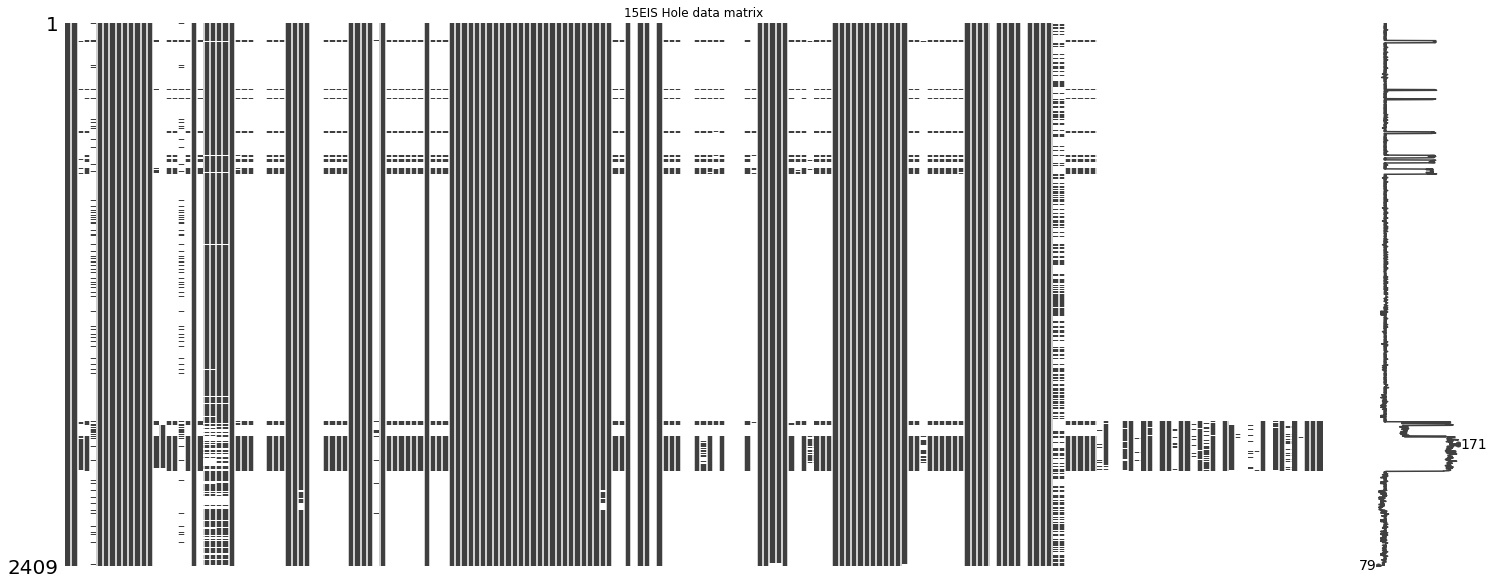

In [11]:
#plt.subplot(4, 2, 1)
msno.matrix(df)
#msno.matrix(df01)
plt.title('15EIS Hole data matrix')

plt.tight_layout()
plt.show()

In [12]:
#df.isna().sum()

In [13]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=20)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [14]:
print(df.shape)
print(df001.shape)
print(df002.shape)
print(df003.shape)
print(df004.shape)
#print(list(df.columns))

(2409, 200)
(669, 200)
(703, 200)
(905, 200)
(1401, 200)


In [15]:
df1=df[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

In [16]:
#df1.shape
#df1.columns

In [17]:
df1_001=df001[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

df1_002=df002[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

df1_003=df003[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

df1_004=df004[['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_Code','DS_U_TIR_TSA703_Group','DS_U_TIR_TSA703_Mineral',\
       'Felsic-Mafic_Index_Wvl','Felsic-Mafic_Index_wvl_RMean','Lith1_Code','Lith1_GrainSize','Lith1_Struct_Int',\
      'Lith1_Structure','Lith1_Texture1','Res_Deep','SSD_gcc','Sulph1_Code','Sulph1_Style','Susc_SI_10-3','Depth_m','Vel_geomean_ms',\
       'Vel_std_ms','Au_ppm']]

In [18]:
df1.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_001.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_002.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_003.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

df1_004.columns=['As_ppm','Cu_ppm','Pb_ppm','Sb_ppm','W_ppm','Zn_ppm','Alt1_code','DS_U_grp','DS_U_mnrl','Felsic_mfc_idx',\
            'Felsic_mfc_Rmean','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','ResDeep','SSD_gcc',\
            'Sulph1_code','Sulph1_style','Susp_SI','Depth_m','Vel_geomean','Vel_std','Au_ppm']

In [19]:
df1.head()

,As_ppm,Cu_ppm,Pb_ppm,Sb_ppm,W_ppm,Zn_ppm,Alt1_code,DS_U_grp,DS_U_mnrl,Felsic_mfc_idx,Felsic_mfc_Rmean,Lith1_code,Lith1_grnsz,Lith1_strctInt,Lith1-strct,Lith1_textr,ResDeep,SSD_gcc,Sulph1_code,Sulph1_style,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
0,NaN,NaN,NaN,NaN,NaN,NaN,ch,AMPHIBOLE,Quartz,9555.8535,9556.0693,Abu,fg,v,sh,ma,0.437919,3.134581,py,ds,-0.002080,495.81237,7316.6562,12.472190,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,ch,SILICA,Quartz,9649.8671,9671.0957,Abu,fg,v,sh,ma,0.675465,3.108093,py,ds,0.003907,496.27307,7316.6562,12.472190,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,ch,AMPHIBOLE,Quartz,9743.6796,9735.1005,Abu,fg,v,sh,ma,1.123893,3.109071,py,ds,-0.000964,496.74954,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,ch,AMPHIBOLE,Quartz,9750.4863,9758.8183,Abu,fg,v,sh,ma,128.968990,3.107897,py,ds,-0.002750,497.28299,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,ch,AMPHIBOLE,Quartz,9834.6845,9831.6513,Abu,fg,v,sh,ma,1093.363500,3.147212,py,ds,0.007615,497.72323,6389.9843,14.142135,NaN


In [20]:
df2_15EIS=df1.drop(['As_ppm','Cu_ppm','Pb_ppm','W_ppm','Zn_ppm','Sb_ppm'], axis=1) # for 15EIS hole
df2_001=df1_001.drop(['As_ppm','Cu_ppm','Pb_ppm','W_ppm','Zn_ppm','Sb_ppm','Felsic_mfc_idx','ResDeep','SSD_gcc','Susp_SI','Vel_std','Sulph1_style'], axis=1) #for dd001 hole
df2_002=df1_002.drop(['As_ppm','Cu_ppm','Pb_ppm','W_ppm','Zn_ppm','Sb_ppm','Felsic_mfc_Rmean','ResDeep','SSD_gcc','Susp_SI','Vel_std','Sulph1_style','Vel_geomean'], axis=1) # for dd0002 hole
df2_003=df1_003.drop(['As_ppm','Cu_ppm','Pb_ppm','W_ppm','Zn_ppm','Sb_ppm','Felsic_mfc_idx','ResDeep','SSD_gcc','Sulph1_style'], axis=1) # for dd003B hole
df2_004=df1_004.drop(['As_ppm','Cu_ppm','Pb_ppm','W_ppm','Zn_ppm','Sb_ppm','Felsic_mfc_idx','ResDeep','SSD_gcc','Susp_SI','Sulph1_style'], axis=1) #for dd0004 hole

In [21]:
print(df2_15EIS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alt1_code         2409 non-null   object 
 1   DS_U_grp          2409 non-null   object 
 2   DS_U_mnrl         2409 non-null   object 
 3   Felsic_mfc_idx    2406 non-null   float64
 4   Felsic_mfc_Rmean  2406 non-null   float64
 5   Lith1_code        2409 non-null   object 
 6   Lith1_grnsz       2409 non-null   object 
 7   Lith1_strctInt    2409 non-null   object 
 8   Lith1-strct       2409 non-null   object 
 9   Lith1_textr       2409 non-null   object 
 10  ResDeep           2396 non-null   float64
 11  SSD_gcc           2408 non-null   float64
 12  Sulph1_code       2409 non-null   object 
 13  Sulph1_style      2409 non-null   object 
 14  Susp_SI           2401 non-null   float64
 15  Depth_m           2409 non-null   float64
 16  Vel_geomean       1053 non-null   float64


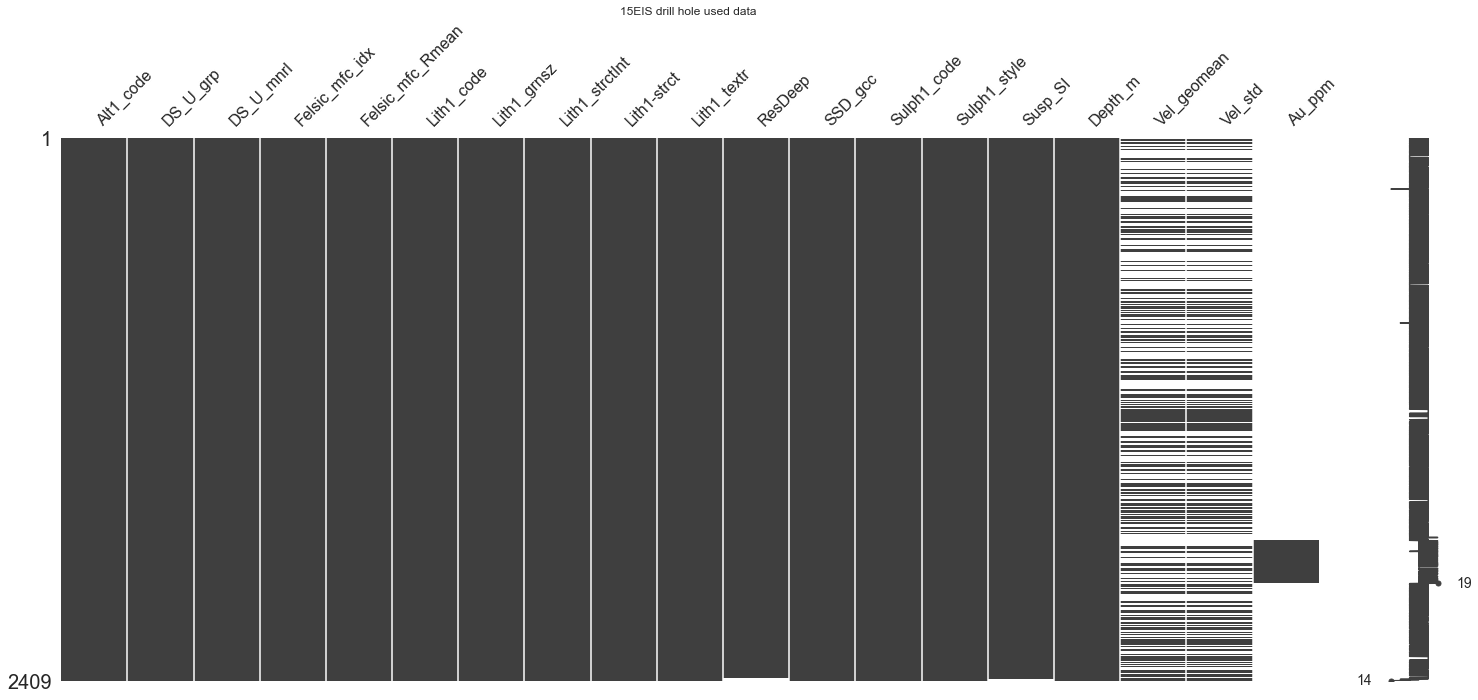

In [22]:
msno.matrix(df2_15EIS)
plt.title('15EIS drill hole used data ')
plt.show()

In [23]:
cat_df2_15EIS=df2_15EIS.select_dtypes(include=['object'].copy())
cat_df2_001=df2_001.select_dtypes(include=['object'].copy())
cat_df2_002=df2_002.select_dtypes(include=['object'].copy())
cat_df2_003=df2_003.select_dtypes(include=['object'].copy())
cat_df2_004=df2_004.select_dtypes(include=['object'].copy())

In [24]:
num_df2_15EIS=df2_15EIS.select_dtypes(include=['float64'].copy())
num_df2_001=df2_001.select_dtypes(include=['float64'].copy())
num_df2_002=df2_002.select_dtypes(include=['float64'].copy())
num_df2_003=df2_003.select_dtypes(include=['float64'].copy())
num_df2_004=df2_004.select_dtypes(include=['float64'].copy())

In [25]:
cat_df2_15EIS.head()

,Alt1_code,DS_U_grp,DS_U_mnrl,Lith1_code,Lith1_grnsz,Lith1_strctInt,Lith1-strct,Lith1_textr,Sulph1_code,Sulph1_style
0,ch,AMPHIBOLE,Quartz,Abu,fg,v,sh,ma,py,ds
1,ch,SILICA,Quartz,Abu,fg,v,sh,ma,py,ds
2,ch,AMPHIBOLE,Quartz,Abu,fg,v,sh,ma,py,ds
3,ch,AMPHIBOLE,Quartz,Abu,fg,v,sh,ma,py,ds
4,ch,AMPHIBOLE,Quartz,Abu,fg,v,sh,ma,py,ds


In [26]:
num_df2_15EIS.head()

,Felsic_mfc_idx,Felsic_mfc_Rmean,ResDeep,SSD_gcc,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
0,9555.8535,9556.0693,0.437919,3.134581,-0.002080,495.81237,7316.6562,12.472190,NaN
1,9649.8671,9671.0957,0.675465,3.108093,0.003907,496.27307,7316.6562,12.472190,NaN
2,9743.6796,9735.1005,1.123893,3.109071,-0.000964,496.74954,NaN,NaN,NaN
3,9750.4863,9758.8183,128.968990,3.107897,-0.002750,497.28299,NaN,NaN,NaN
4,9834.6845,9831.6513,1093.363500,3.147212,0.007615,497.72323,6389.9843,14.142135,NaN


In [27]:
#Apply per-column the mean of that columns and fill
num_df2_15EIS_fillna=num_df2_15EIS.apply(lambda x: x.fillna(x.mean()),axis=0)
num_df2_001_fillna=num_df2_001.apply(lambda x: x.fillna(x.mean()),axis=0)
num_df2_002_fillna=num_df2_002.apply(lambda x: x.fillna(x.mean()),axis=0)
num_df2_003_fillna=num_df2_003.apply(lambda x: x.fillna(x.mean()),axis=0)
num_df2_004_fillna=num_df2_004.apply(lambda x: x.fillna(x.mean()),axis=0)

In [28]:
print(num_df2_15EIS_fillna.shape)
print(num_df2_001_fillna.shape)
print(num_df2_002_fillna.shape)
print(num_df2_003_fillna.shape)
print(num_df2_004_fillna.shape)

(2409, 9)
(669, 4)
(703, 3)
(905, 6)
(1401, 5)


In [29]:
num_df2_15EIS_fillna.head()

,Felsic_mfc_idx,Felsic_mfc_Rmean,ResDeep,SSD_gcc,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
0,9555.8535,9556.0693,0.437919,3.134581,-0.002080,495.81237,7316.656200,12.472190,0.580984
1,9649.8671,9671.0957,0.675465,3.108093,0.003907,496.27307,7316.656200,12.472190,0.580984
2,9743.6796,9735.1005,1.123893,3.109071,-0.000964,496.74954,6002.075272,23.609871,0.580984
3,9750.4863,9758.8183,128.968990,3.107897,-0.002750,497.28299,6002.075272,23.609871,0.580984
4,9834.6845,9831.6513,1093.363500,3.147212,0.007615,497.72323,6389.984300,14.142135,0.580984


In [30]:
print(cat_df2_15EIS.isnull().sum())

Alt1_code         0
DS_U_grp          0
DS_U_mnrl         0
Lith1_code        0
Lith1_grnsz       0
Lith1_strctInt    0
Lith1-strct       0
Lith1_textr       0
Sulph1_code       0
Sulph1_style      0
dtype: int64


In [31]:
cat_df2_15EIS.columns

Index(['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code',
       'Sulph1_style'],
      dtype='object')

In [32]:
print(cat_df2_15EIS['Alt1_code'].value_counts())

ch        1695
sl         359
ascb_s      99
Xobs        98
bi          45
ascb_m      36
ascb_w      22
si          20
ab          11
sacb         9
hemag        8
ep           4
he           3
Name: Alt1_code, dtype: int64


In [33]:
print("Alt1_code:",cat_df2_15EIS['Lith1_textr'].value_counts())

Alt1_code: ma      1463
bd       372
po       255
be       120
ah        93
Xobs      50
cz        29
bb        13
si         4
sp         3
tu         3
cc         2
cx         1
fr         1
Name: Lith1_textr, dtype: int64


In [34]:
print("Alt1_code:",cat_df2_15EIS['Alt1_code'].value_counts().count())
print("Lith1_textr:",cat_df2_15EIS['Lith1_textr'].value_counts().count())
print("Sulph_code:",cat_df2_15EIS['Sulph1_code'].value_counts().count())
print("Sulph_style:",cat_df2_15EIS['Sulph1_style'].value_counts().count())

Alt1_code: 13
Lith1_textr: 14
Sulph_code: 5
Sulph_style: 8


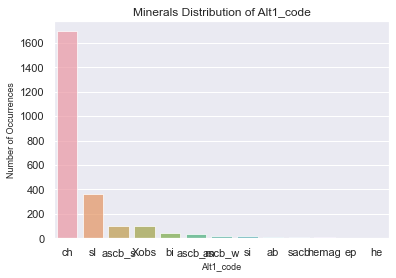

In [35]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
Alt1_code_count = cat_df2_15EIS['Alt1_code'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Alt1_code_count.index, Alt1_code_count.values, alpha=0.7)
plt.title('Minerals Distribution of Alt1_code')
plt.ylabel('Number of Occurrences', fontsize=9)
plt.xlabel('Alt1_code', fontsize=9)
#plt.figure(figsize=(21,9))
plt.show()

<Figure size 432x288 with 0 Axes>

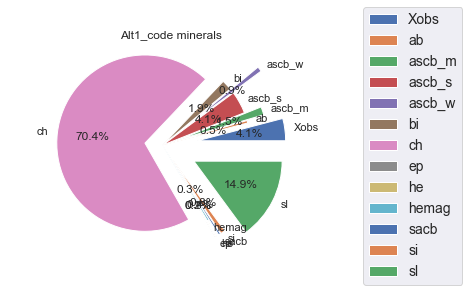

In [36]:
plt.figure(0)
labels = cat_df2_15EIS['Alt1_code'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Alt1_code'].value_counts()
explode = (0.4, 0, 0.2, 0, 0.4, 0, 0.2, 0.2, 0.2, 0, 0.2, 0.2, 0.4)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=14, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Alt1_code minerals')
plt.tight_layout()
plt.show()

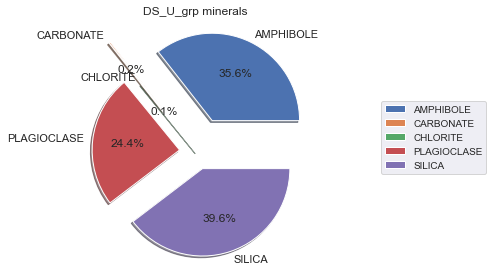

In [37]:
labels = cat_df2_15EIS['DS_U_grp'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['DS_U_grp'].value_counts()
explode = (0.4, 0.6, 0, 0.2, 0.2)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('DS_U_grp minerals')
plt.tight_layout()
plt.show()

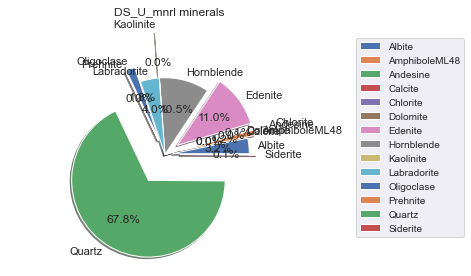

In [38]:
labels = cat_df2_15EIS['DS_U_mnrl'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['DS_U_mnrl'].value_counts()
explode = (0.1, 0.2, 0.3, 0, 0.4, 0, 0.2, 0, 0.6, 0, 0.2, 0.2, 0.4,0.2)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('DS_U_mnrl minerals')
plt.tight_layout()
plt.show()

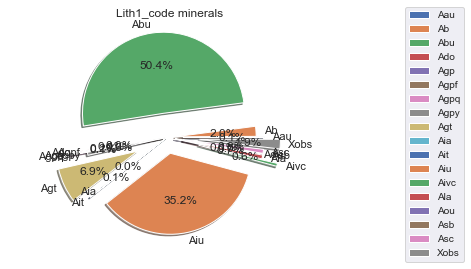

In [39]:
labels = cat_df2_15EIS['Lith1_code'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Lith1_code'].value_counts()
explode = (0.2, 0.1, 0.3, 0.1, 0.2, 0, 0.2, 0, 0.4, 0, 0.2, 0.2, 0.4,0.2,0.1,0.2,0.2,0.4)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Lith1_code minerals')
plt.tight_layout()
plt.show()

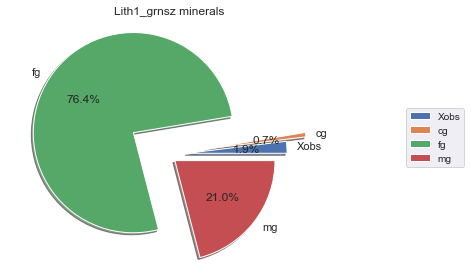

In [40]:
labels = cat_df2_15EIS['Lith1_grnsz'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Lith1_grnsz'].value_counts()
explode = (0.2, 0.4, 0.4, 0.1)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Lith1_grnsz minerals')
plt.tight_layout()
plt.show()

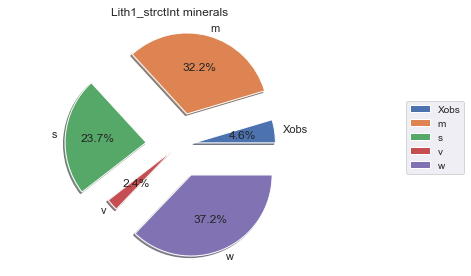

In [41]:
labels = cat_df2_15EIS['Lith1_strctInt'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Lith1_strctInt'].value_counts()
explode = (0.2, 0.4, 0.4, 0.1,0.4)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Lith1_strctInt minerals')
plt.tight_layout()
plt.show()

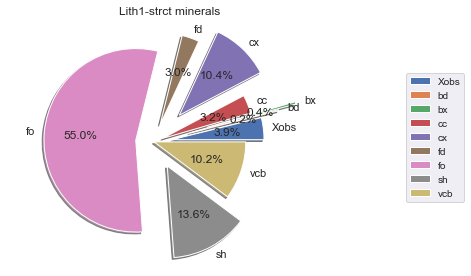

In [42]:
labels = cat_df2_15EIS['Lith1-strct'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Lith1-strct'].value_counts()
explode = (0.2, 0.4, 0.6, 0.1,0.4,0.2,0.2,0.3,0)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Lith1-strct minerals')
plt.tight_layout()
plt.show()

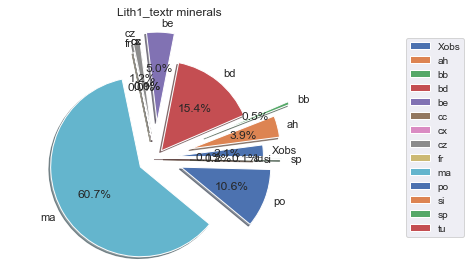

In [43]:
labels = cat_df2_15EIS['Lith1_textr'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Lith1_textr'].value_counts()
explode = (0.2, 0.4, 0.6, 0.1,0.4,0.2,0.2,0.3,0.2,0.2,0.3,0.1,0.4,0)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Lith1_textr minerals')
plt.tight_layout()
plt.show()

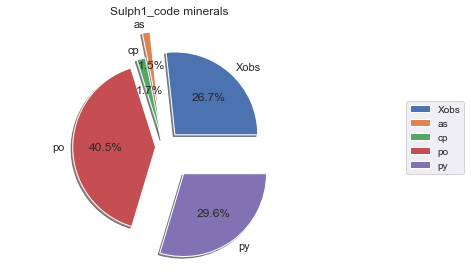

In [44]:
labels = cat_df2_15EIS['Sulph1_code'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Sulph1_code'].value_counts()
explode = (0.2, 0.4, 0.1, 0.1,0.4)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Sulph1_code minerals')
plt.tight_layout()
plt.show()

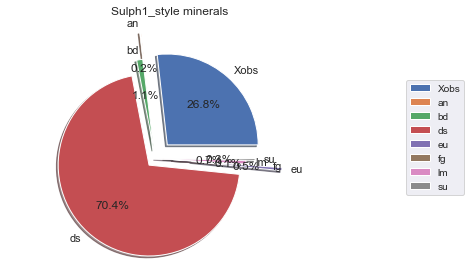

In [45]:
labels = cat_df2_15EIS['Sulph1_style'].astype('category').cat.categories.tolist()
counts = cat_df2_15EIS['Sulph1_style'].value_counts()
explode = (0.2, 0.4, 0.1, 0.1,0.4,0.2,0,0.1)  # explode alternate slice
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Sulph1_style minerals')
plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import LabelBinarizer
#import category_encoders as ce

In [47]:
#pip install category_encoders

In [48]:
import category_encoders as ce

In [49]:
#cat_df2_ce.head()
cat_df2_15EIS.columns

Index(['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code',
       'Sulph1_style'],
      dtype='object')

In [50]:
cat_df2_001.columns

Index(['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'],
      dtype='object')

In [51]:
cat_df2_002.columns

Index(['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'],
      dtype='object')

In [52]:
cat_df2_003.columns

Index(['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'],
      dtype='object')

In [53]:
cat_df2_004.columns

Index(['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'],
      dtype='object')

In [54]:
cat_df2_15EIS_ce = cat_df2_15EIS.copy()
cat_df2_001_ce = cat_df2_001.copy()
cat_df2_002_ce = cat_df2_002.copy()
cat_df2_003_ce = cat_df2_003.copy()
cat_df2_004_ce = cat_df2_004.copy()

In [55]:
#cat_df2_002_ce.shape

In [56]:
cat_df2_15EIS_ce_onehot = cat_df2_15EIS.copy()
cat_df2_15EIS_ce_onehot = pd.get_dummies(cat_df2_15EIS_ce_onehot, columns=['Alt1_code','DS_U_grp','DS_U_mnrl','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','Sulph1_code','Sulph1_style'], 
                                   prefix = ['Alt1_code','DS_U_grp','DS_U_mnrl','Lith1_code','Lith1_grnsz','Lith1_strctInt','Lith1-strct','Lith1_textr','Sulph1_code','Sulph1_style'])

In [57]:
cat_df2_001_ce_onehot = cat_df2_001.copy()
cat_df2_001_ce_onehot = pd.get_dummies(cat_df2_001_ce_onehot, columns=['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'], 
                                   prefix = ['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'])

In [58]:
cat_df2_002_ce_onehot = cat_df2_002.copy()
cat_df2_002_ce_onehot = pd.get_dummies(cat_df2_002_ce_onehot, columns=['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'], 
                                   prefix = ['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'])

In [59]:
cat_df2_003_ce_onehot = cat_df2_003.copy()
cat_df2_003_ce_onehot = pd.get_dummies(cat_df2_003_ce_onehot, columns=['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'], 
                                   prefix = ['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'])

In [60]:
cat_df2_004_ce_onehot = cat_df2_004.copy()
cat_df2_004_ce_onehot = pd.get_dummies(cat_df2_004_ce_onehot, columns=['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'], 
                                   prefix = ['Alt1_code', 'DS_U_grp', 'DS_U_mnrl', 'Lith1_code', 'Lith1_grnsz',
       'Lith1_strctInt', 'Lith1-strct', 'Lith1_textr', 'Sulph1_code'])

In [61]:
cat_df2_15EIS_ce_onehot.head()

,Alt1_code_Xobs,Alt1_code_ab,Alt1_code_ascb_m,Alt1_code_ascb_s,Alt1_code_ascb_w,Alt1_code_bi,Alt1_code_ch,Alt1_code_ep,Alt1_code_he,Alt1_code_hemag,Alt1_code_sacb,Alt1_code_si,Alt1_code_sl,DS_U_grp_AMPHIBOLE,DS_U_grp_CARBONATE,DS_U_grp_CHLORITE,DS_U_grp_PLAGIOCLASE,DS_U_grp_SILICA,DS_U_mnrl_Albite,DS_U_mnrl_AmphiboleML48,DS_U_mnrl_Andesine,DS_U_mnrl_Calcite,DS_U_mnrl_Chlorite,DS_U_mnrl_Dolomite,DS_U_mnrl_Edenite,DS_U_mnrl_Hornblende,DS_U_mnrl_Kaolinite,DS_U_mnrl_Labradorite,DS_U_mnrl_Oligoclase,DS_U_mnrl_Prehnite,DS_U_mnrl_Quartz,DS_U_mnrl_Siderite,Lith1_code_Aau,Lith1_code_Ab,Lith1_code_Abu,Lith1_code_Ado,Lith1_code_Agp,Lith1_code_Agpf,Lith1_code_Agpq,Lith1_code_Agpy,Lith1_code_Agt,Lith1_code_Aia,Lith1_code_Ait,Lith1_code_Aiu,Lith1_code_Aivc,Lith1_code_Ala,Lith1_code_Aou,Lith1_code_Asb,Lith1_code_Asc,Lith1_code_Xobs,Lith1_grnsz_Xobs,Lith1_grnsz_cg,Lith1_grnsz_fg,Lith1_grnsz_mg,Lith1_strctInt_Xobs,Lith1_strctInt_m,Lith1_strctInt_s,Lith1_strctInt_v,Lith1_strctInt_w,Lith1-strct_Xobs,Lith1-strct_bd,Lith1-strct_bx,Lith1-strct_cc,Lith1-strct_cx,Lith1-strct_fd,Lith1-strct_fo,Lith1-strct_sh,Lith1-strct_vcb,Lith1_textr_Xobs,Lith1_textr_ah,Lith1_textr_bb,Lith1_textr_bd,Lith1_textr_be,Lith1_textr_cc,Lith1_textr_cx,Lith1_textr_cz,Lith1_textr_fr,Lith1_textr_ma,Lith1_textr_po,Lith1_textr_si,Lith1_textr_sp,Lith1_textr_tu,Sulph1_code_Xobs,Sulph1_code_as,Sulph1_code_cp,Sulph1_code_po,Sulph1_code_py,Sulph1_style_Xobs,Sulph1_style_an,Sulph1_style_bd,Sulph1_style_ds,Sulph1_style_eu,Sulph1_style_fg,Sulph1_style_lm,Sulph1_style_su
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [62]:
#df_bde.describe()
#df_bde.info()
#df_bde.dtypes

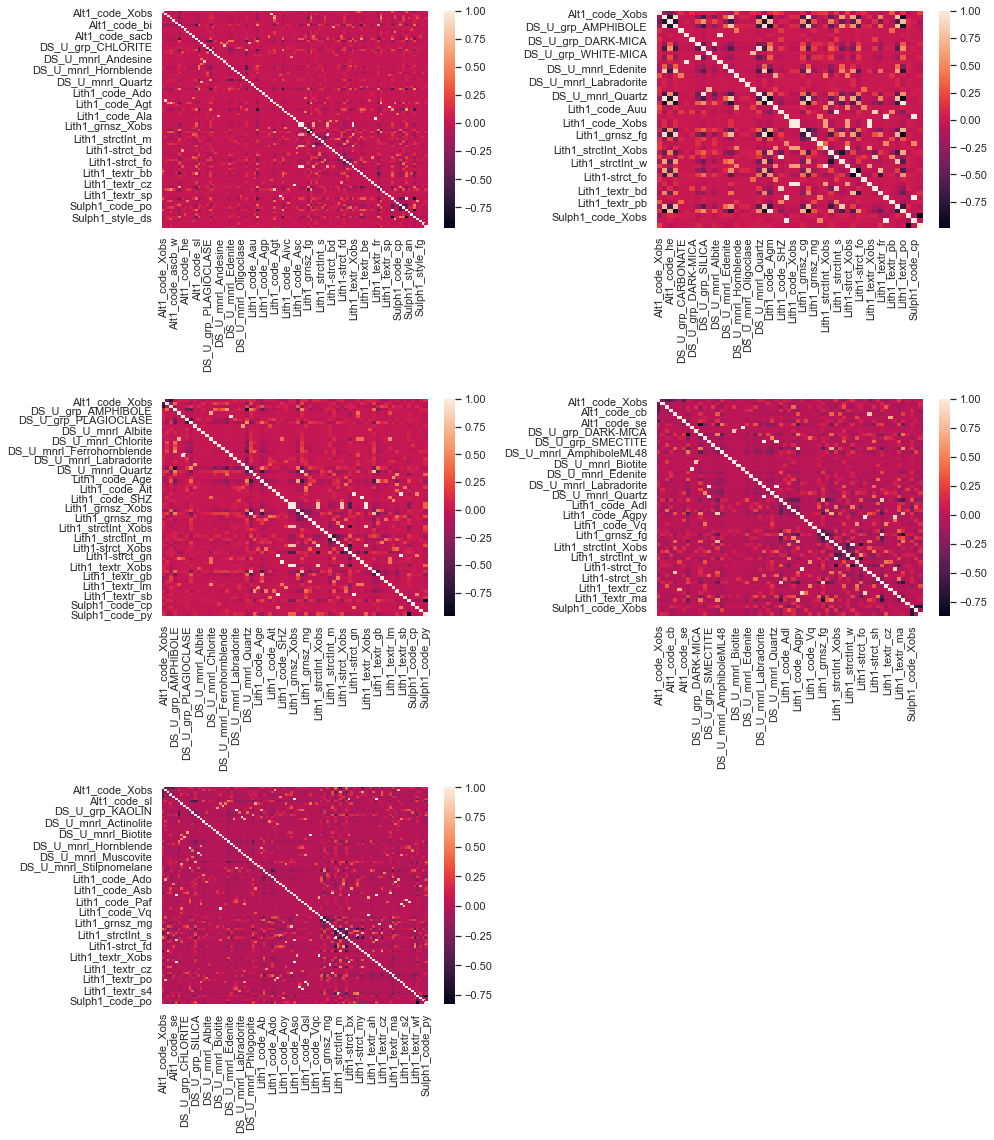

In [63]:
plt.figure(figsize=(14,16))
plt.subplot(3,2,1)
sns.heatmap(cat_df2_15EIS_ce_onehot.corr())

plt.subplot(3,2,2)
sns.heatmap(cat_df2_001_ce_onehot.corr())

plt.subplot(3,2,3)
sns.heatmap(cat_df2_002_ce_onehot.corr())

plt.subplot(3,2,4)
sns.heatmap(cat_df2_003_ce_onehot.corr())

plt.subplot(3,2,5)
sns.heatmap(cat_df2_004_ce_onehot.corr())

plt.tight_layout()

plt.show()

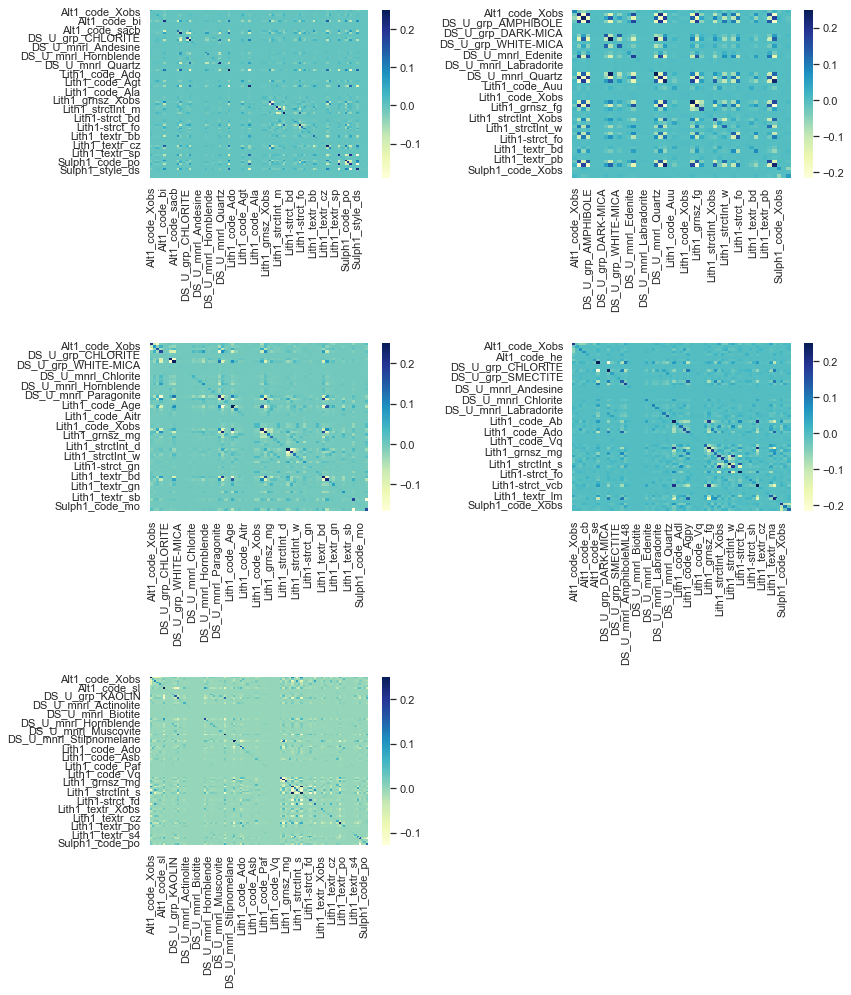

In [64]:
plt.figure(figsize=(12,14))
plt.subplot(3,2,1)
sns.heatmap(cat_df2_15EIS_ce_onehot.cov(), cmap="YlGnBu")

plt.subplot(3,2,2)
sns.heatmap(cat_df2_001_ce_onehot.cov(), cmap="YlGnBu")

plt.subplot(3,2,3)
sns.heatmap(cat_df2_002_ce_onehot.cov(), cmap="YlGnBu")

plt.subplot(3,2,4)
sns.heatmap(cat_df2_003_ce_onehot.cov(), cmap="YlGnBu")

plt.subplot(3,2,5)
sns.heatmap(cat_df2_004_ce_onehot.cov(), cmap="YlGnBu")

plt.tight_layout()

plt.show()

# <span style='background:yellow'> Principal Component Analysis (PCA) </span>

In [65]:
# Categorical features for 15EIS
print(cat_df2_15EIS_ce_onehot.keys())

Index(['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala

In [66]:
# # Categorical features for  dd0001
print(cat_df2_001_ce_onehot.keys())

Index(['Alt1_code_Xobs', 'Alt1_code_ch', 'Alt1_code_he', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_DARK-MICA',
       'DS_U_grp_PLAGIOCLASE', 'DS_U_grp_SILICA', 'DS_U_grp_WHITE-MICA',
       'DS_U_mnrl_Albite', 'DS_U_mnrl_Chlorite', 'DS_U_mnrl_Edenite',
       'DS_U_mnrl_Ferrohornblende', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase', 'DS_U_mnrl_Paragonite',
       'DS_U_mnrl_Quartz', 'Lith1_code_Abu', 'Lith1_code_Agm',
       'Lith1_code_Auu', 'Lith1_code_SHZ', 'Lith1_code_Vq', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_grnsz_vcg', 'Lith1_strctInt_Xobs',
       'Lith1_strctInt_m', 'Lith1_strctInt_s', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bx', 'Lith1-strct_fo',
       'Lith1-strct_sc', 'Lith1_textr_Xobs', 'Lith1_textr_bd',
       'Lith1_textr_fr', 'Lith1_textr_ma', 'Lith1_textr_pb', 'Lith1_textr_pi',
       'Lith1_textr_po

In [67]:
# # Categorical features for  dd0002
print(cat_df2_002_ce_onehot.keys())

Index(['Alt1_code_Xobs', 'Alt1_code_ep', 'Alt1_code_he', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CHLORITE', 'DS_U_grp_KAOLIN', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_grp_WHITE-MICA', 'DS_U_mnrl_Albite',
       'DS_U_mnrl_Anorthite', 'DS_U_mnrl_Bytownite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Edenite', 'DS_U_mnrl_Epidote', 'DS_U_mnrl_Ferrohornblende',
       'DS_U_mnrl_Hornblende', 'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite',
       'DS_U_mnrl_Oligoclase', 'DS_U_mnrl_Paragonite', 'DS_U_mnrl_Quartz',
       'Lith1_code_Abu', 'Lith1_code_Ado', 'Lith1_code_Age', 'Lith1_code_Agmq',
       'Lith1_code_Agt', 'Lith1_code_Ait', 'Lith1_code_Aitr',
       'Lith1_code_LODE', 'Lith1_code_SHZ', 'Lith1_code_UNKN',
       'Lith1_code_Xobs', 'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg',
       'Lith1_grnsz_fg', 'Lith1_grnsz_mg', 'Lith1_grnsz_vcg',
       'Lith1_grnsz_vfg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_d',
       'Lith1_strctInt_i', 'Lith1_strctInt_m', 'Lith1_strctInt_s',
       

In [68]:
# # Categorical features for  dd0003
print(cat_df2_003_ce_onehot.keys())

Index(['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_bi', 'Alt1_code_cb',
       'Alt1_code_he', 'Alt1_code_qc', 'Alt1_code_se', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CHLORITE', 'DS_U_grp_DARK-MICA', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_grp_SMECTITE', 'DS_U_mnrl_Actinolite',
       'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48', 'DS_U_mnrl_Andesine',
       'DS_U_mnrl_Anorthite', 'DS_U_mnrl_Biotite', 'DS_U_mnrl_Bytownite',
       'DS_U_mnrl_Chlorite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Epidote',
       'DS_U_mnrl_Hornblende', 'DS_U_mnrl_Labradorite',
       'DS_U_mnrl_Montmorillonite', 'DS_U_mnrl_Oligoclase', 'DS_U_mnrl_Quartz',
       'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Adl', 'Lith1_code_Adm',
       'Lith1_code_Ado', 'Lith1_code_Agpy', 'Lith1_code_Aivc',
       'Lith1_code_Asm', 'Lith1_code_Vq', 'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg',
       'Lith1_grnsz_fg', 'Lith1_grnsz_mg', 'Lith1_grnsz_vcg',
       'Lith1_strctInt_Xobs', 'Lith1_strctInt_m', 'Lith1_strctInt

In [69]:
# # Categorical features for  dd0001
print(cat_df2_004_ce_onehot.keys())

Index(['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_bi', 'Alt1_code_cb',
       'Alt1_code_se', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_DARK-MICA',
       'DS_U_grp_KAOLIN', 'DS_U_grp_PLAGIOCLASE', 'DS_U_grp_SILICA',
       'DS_U_grp_SMECTITE', 'DS_U_grp_WHITE-MICA', 'DS_U_mnrl_Actinolite',
       'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48', 'DS_U_mnrl_Andesine',
       'DS_U_mnrl_Anorthite', 'DS_U_mnrl_Biotite', 'DS_U_mnrl_Calcite',
       'DS_U_mnrl_Chlorite', 'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite',
       'DS_U_mnrl_Hornblende', 'DS_U_mnrl_Illite', 'DS_U_mnrl_Kaolinite',
       'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Montmorillonite',
       'DS_U_mnrl_Muscovite', 'DS_U_mnrl_Oligoclase', 'DS_U_mnrl_Phlogopite',
       'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite', 'DS_U_mnrl_Stilpnomelane',
       'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Adl', 'Lith1_code_Adm',
       'Lith1_code_Ado', 'Lith1_code_Adq', 'Lith1_code_Agpf',
 

In [70]:
cat_features_15EIS =['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su']

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [72]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [73]:
scaled_num_df2_15EIS_fillna = pd.DataFrame(scaler.fit_transform(num_df2_15EIS_fillna), columns=num_df2_15EIS_fillna.columns)
scaled_num_df2_001_fillna = pd.DataFrame(scaler.fit_transform(num_df2_001_fillna), columns=num_df2_001_fillna.columns)
scaled_num_df2_002_fillna = pd.DataFrame(scaler.fit_transform(num_df2_002_fillna), columns=num_df2_002_fillna.columns)
scaled_num_df2_003_fillna = pd.DataFrame(scaler.fit_transform(num_df2_003_fillna), columns=num_df2_003_fillna.columns)
scaled_num_df2_004_fillna = pd.DataFrame(scaler.fit_transform(num_df2_004_fillna), columns=num_df2_004_fillna.columns)

In [74]:
scaled_num_df2_15EIS_fillna.head()

,Felsic_mfc_idx,Felsic_mfc_Rmean,ResDeep,SSD_gcc,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
0,0.510125,0.509152,0.000000,0.763027,0.004504,0.000000,0.937945,0.214843,0.208494
1,0.569692,0.581917,0.000019,0.737739,0.044752,0.000382,0.937945,0.214843,0.208494
2,0.629132,0.622406,0.000054,0.738673,0.012007,0.000778,0.665967,0.523274,0.208494
3,0.633445,0.637410,0.010180,0.737552,0.000000,0.001220,0.665967,0.523274,0.208494
4,0.686793,0.683484,0.086563,0.775085,0.069683,0.001585,0.746222,0.261088,0.208494


In [75]:
df_comb_15EIS = pd.concat([cat_df2_15EIS_ce_onehot,scaled_num_df2_15EIS_fillna],axis=1)
df_comb_001 = pd.concat([cat_df2_001_ce_onehot,scaled_num_df2_001_fillna],axis=1)
df_comb_002 = pd.concat([cat_df2_002_ce_onehot,scaled_num_df2_002_fillna],axis=1)
df_comb_003 = pd.concat([cat_df2_003_ce_onehot,scaled_num_df2_003_fillna],axis=1)
df_comb_004 = pd.concat([cat_df2_004_ce_onehot,scaled_num_df2_004_fillna],axis=1)

In [76]:
print(df_comb_15EIS.shape)
print(df_comb_001.shape)
print(df_comb_002.shape)
print(df_comb_003.shape)
print(df_comb_004.shape)

(2409, 104)
(669, 52)
(703, 70)
(905, 69)
(1401, 102)


In [77]:
#list(df_comb_15EIS.columns)

In [78]:
features_15EIS =['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su','Felsic_mfc_idx', 'Felsic_mfc_Rmean', 'ResDeep',
       'SSD_gcc', 'Susp_SI', 'Depth_m', 'Vel_geomean', 'Vel_std']

In [79]:
scaled_df_comb_15EIS=df_comb_15EIS.copy()
scaled_df_comb_001=df_comb_001.copy()
scaled_df_comb_002=df_comb_002.copy()
scaled_df_comb_003=df_comb_003.copy()
scaled_df_comb_004=df_comb_004.copy()

###### Reference https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
###### Reference https://medium.com/cascade-bio-blog/creating-visualizations-to-better-understand-your-data-and-models-part-1-a51e7e5af9c0

In [80]:
#print('Standard deviation\n\n',scaled_df_comb.std(axis=0)) #checking for scalar (for good scalar std~1 & mean~0)
#print('Mean\n\n',scaled_df_comb.mean(axis=0)) 

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca_15EIS = PCA(n_components=20)
pca_15EIS.fit(scaled_df_comb_15EIS)

PCA(n_components=20)

In [83]:
print(scaled_df_comb_15EIS.shape)
print(scaled_df_comb_001.shape)
print(scaled_df_comb_002.shape)
print(scaled_df_comb_003.shape)
print(scaled_df_comb_004.shape)

(2409, 104)
(669, 52)
(703, 70)
(905, 69)
(1401, 102)


In [84]:
x_pca_15EIS = pca_15EIS.transform(scaled_df_comb_15EIS)

In [85]:
x_pca_15EIS.shape

(2409, 20)

In [86]:
scaled_df_comb_15EIS.shape
#scaled_df_comb.dtypes

(2409, 104)

In [87]:
scaled_df_comb_15EIS.head()

,Alt1_code_Xobs,Alt1_code_ab,Alt1_code_ascb_m,Alt1_code_ascb_s,Alt1_code_ascb_w,Alt1_code_bi,Alt1_code_ch,Alt1_code_ep,Alt1_code_he,Alt1_code_hemag,Alt1_code_sacb,Alt1_code_si,Alt1_code_sl,DS_U_grp_AMPHIBOLE,DS_U_grp_CARBONATE,DS_U_grp_CHLORITE,DS_U_grp_PLAGIOCLASE,DS_U_grp_SILICA,DS_U_mnrl_Albite,DS_U_mnrl_AmphiboleML48,DS_U_mnrl_Andesine,DS_U_mnrl_Calcite,DS_U_mnrl_Chlorite,DS_U_mnrl_Dolomite,DS_U_mnrl_Edenite,DS_U_mnrl_Hornblende,DS_U_mnrl_Kaolinite,DS_U_mnrl_Labradorite,DS_U_mnrl_Oligoclase,DS_U_mnrl_Prehnite,DS_U_mnrl_Quartz,DS_U_mnrl_Siderite,Lith1_code_Aau,Lith1_code_Ab,Lith1_code_Abu,Lith1_code_Ado,Lith1_code_Agp,Lith1_code_Agpf,Lith1_code_Agpq,Lith1_code_Agpy,Lith1_code_Agt,Lith1_code_Aia,Lith1_code_Ait,Lith1_code_Aiu,Lith1_code_Aivc,Lith1_code_Ala,Lith1_code_Aou,Lith1_code_Asb,Lith1_code_Asc,Lith1_code_Xobs,Lith1_grnsz_Xobs,Lith1_grnsz_cg,Lith1_grnsz_fg,Lith1_grnsz_mg,Lith1_strctInt_Xobs,Lith1_strctInt_m,Lith1_strctInt_s,Lith1_strctInt_v,Lith1_strctInt_w,Lith1-strct_Xobs,Lith1-strct_bd,Lith1-strct_bx,Lith1-strct_cc,Lith1-strct_cx,Lith1-strct_fd,Lith1-strct_fo,Lith1-strct_sh,Lith1-strct_vcb,Lith1_textr_Xobs,Lith1_textr_ah,Lith1_textr_bb,Lith1_textr_bd,Lith1_textr_be,Lith1_textr_cc,Lith1_textr_cx,Lith1_textr_cz,Lith1_textr_fr,Lith1_textr_ma,Lith1_textr_po,Lith1_textr_si,Lith1_textr_sp,Lith1_textr_tu,Sulph1_code_Xobs,Sulph1_code_as,Sulph1_code_cp,Sulph1_code_po,Sulph1_code_py,Sulph1_style_Xobs,Sulph1_style_an,Sulph1_style_bd,Sulph1_style_ds,Sulph1_style_eu,Sulph1_style_fg,Sulph1_style_lm,Sulph1_style_su,Felsic_mfc_idx,Felsic_mfc_Rmean,ResDeep,SSD_gcc,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.510125,0.509152,0.000000,0.763027,0.004504,0.000000,0.937945,0.214843,0.208494
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.569692,0.581917,0.000019,0.737739,0.044752,0.000382,0.937945,0.214843,0.208494
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.629132,0.622406,0.000054,0.738673,0.012007,0.000778,0.665967,0.523274,0.208494
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.633445,0.637410,0.010180,0.737552,0.000000,0.001220,0.665967,0.523274,0.208494
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.686793,0.683484,0.086563,0.775085,0.069683,0.001585,0.746222,0.261088,0.208494


In [88]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
target_15EIS= scaled_df_comb_15EIS['Au_ppm']

In [90]:
x_pca_15EIS[:1]

array([[-1.12899507,  0.57384612,  0.23894049, -0.82443759, -0.10911717,
        -0.38252444, -0.45353341,  0.32013401,  0.2317488 , -0.25785575,
        -0.02619339, -0.7622657 , -0.09499104,  0.40659421, -0.70846045,
         0.57485581, -0.04569   ,  0.10889601, -0.11523726, -0.08941181]])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=100)
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=target, s=30,)
ax.legend(['Target'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(50, 150)

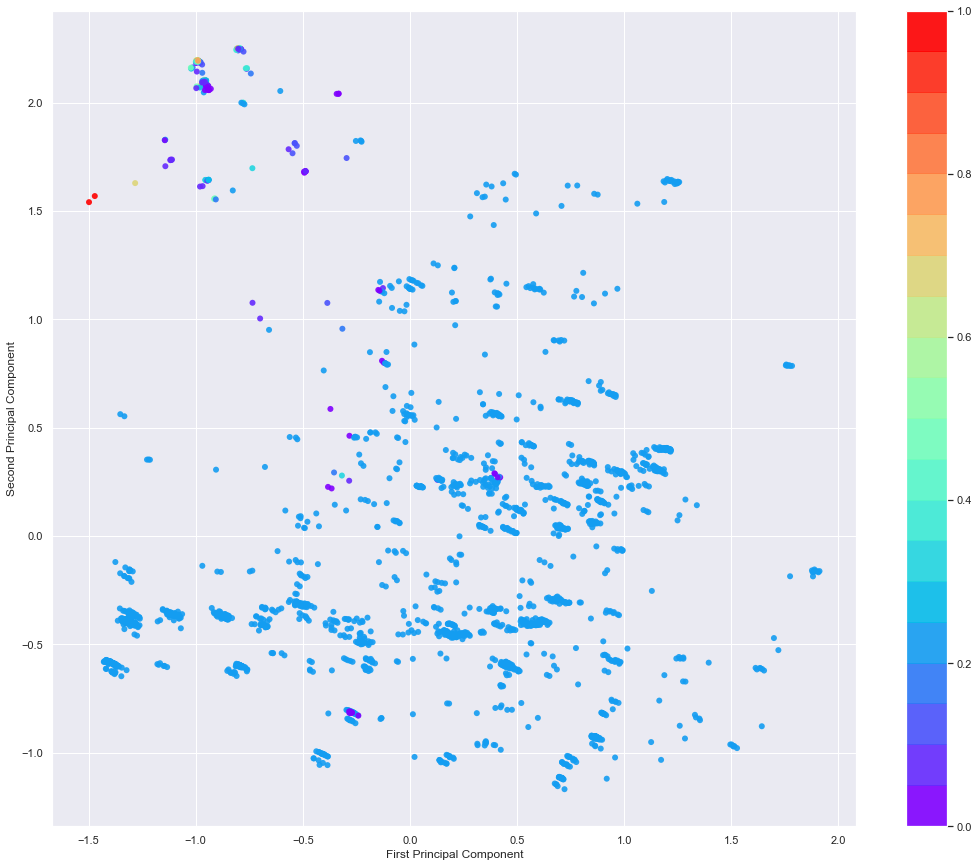

In [91]:
plt.figure(figsize=(18,15))
plt.scatter(x_pca_15EIS[:, 1], x_pca_15EIS[:, 2],
            c=scaled_df_comb_15EIS['Au_ppm'], edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar();

In [92]:
# Dump components relations with features:
#df_components_features=pd.DataFrame(pca.components_,columns=scaled_df_comb.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])
#from scipy.stats import boxcox

In [93]:
# Dump components relations with features:
df_components_15EIS_features=pd.DataFrame(pca_15EIS.components_,columns=scaled_df_comb_15EIS.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                                                                           'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])

In [94]:
df_components_15EIS_features.head(3)

,Alt1_code_Xobs,Alt1_code_ab,Alt1_code_ascb_m,Alt1_code_ascb_s,Alt1_code_ascb_w,Alt1_code_bi,Alt1_code_ch,Alt1_code_ep,Alt1_code_he,Alt1_code_hemag,Alt1_code_sacb,Alt1_code_si,Alt1_code_sl,DS_U_grp_AMPHIBOLE,DS_U_grp_CARBONATE,DS_U_grp_CHLORITE,DS_U_grp_PLAGIOCLASE,DS_U_grp_SILICA,DS_U_mnrl_Albite,DS_U_mnrl_AmphiboleML48,DS_U_mnrl_Andesine,DS_U_mnrl_Calcite,DS_U_mnrl_Chlorite,DS_U_mnrl_Dolomite,DS_U_mnrl_Edenite,DS_U_mnrl_Hornblende,DS_U_mnrl_Kaolinite,DS_U_mnrl_Labradorite,DS_U_mnrl_Oligoclase,DS_U_mnrl_Prehnite,DS_U_mnrl_Quartz,DS_U_mnrl_Siderite,Lith1_code_Aau,Lith1_code_Ab,Lith1_code_Abu,Lith1_code_Ado,Lith1_code_Agp,Lith1_code_Agpf,Lith1_code_Agpq,Lith1_code_Agpy,Lith1_code_Agt,Lith1_code_Aia,Lith1_code_Ait,Lith1_code_Aiu,Lith1_code_Aivc,Lith1_code_Ala,Lith1_code_Aou,Lith1_code_Asb,Lith1_code_Asc,Lith1_code_Xobs,Lith1_grnsz_Xobs,Lith1_grnsz_cg,Lith1_grnsz_fg,Lith1_grnsz_mg,Lith1_strctInt_Xobs,Lith1_strctInt_m,Lith1_strctInt_s,Lith1_strctInt_v,Lith1_strctInt_w,Lith1-strct_Xobs,Lith1-strct_bd,Lith1-strct_bx,Lith1-strct_cc,Lith1-strct_cx,Lith1-strct_fd,Lith1-strct_fo,Lith1-strct_sh,Lith1-strct_vcb,Lith1_textr_Xobs,Lith1_textr_ah,Lith1_textr_bb,Lith1_textr_bd,Lith1_textr_be,Lith1_textr_cc,Lith1_textr_cx,Lith1_textr_cz,Lith1_textr_fr,Lith1_textr_ma,Lith1_textr_po,Lith1_textr_si,Lith1_textr_sp,Lith1_textr_tu,Sulph1_code_Xobs,Sulph1_code_as,Sulph1_code_cp,Sulph1_code_po,Sulph1_code_py,Sulph1_style_Xobs,Sulph1_style_an,Sulph1_style_bd,Sulph1_style_ds,Sulph1_style_eu,Sulph1_style_fg,Sulph1_style_lm,Sulph1_style_su,Felsic_mfc_idx,Felsic_mfc_Rmean,ResDeep,SSD_gcc,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
PC-1,0.028728,0.001452,0.010165,0.027622,0.005743,-0.003442,-0.251283,0.001364,0.000576,0.002489,0.002318,0.010716,0.163551,-0.239007,-0.001339,-0.000458,-0.016451,0.257254,0.012255,-0.009954,-0.000134,-0.000245,-0.000467,-0.000157,-0.091508,-0.047868,-0.000311,-0.025875,0.004550,0.000281,0.160110,-0.000677,-0.000052,0.006508,-0.356749,-0.000474,0.000485,0.000141,0.000873,0.002475,0.047208,-0.000174,0.000687,0.275904,0.002078,-0.000613,-0.000242,0.000318,-0.000480,0.022107,0.022107,0.004735,-0.155138,0.128296,0.028506,0.038452,-0.036663,-0.017929,-0.012367,0.017589,-0.000104,0.001284,-0.023908,-0.077854,0.031352,0.145482,-0.007660,-0.086182,0.023471,-0.024446,0.007311,0.142234,0.044932,0.000280,0.000402,0.015173,0.000318,-0.254715,0.041488,0.002513,0.000353,0.000687,0.265191,0.011530,-0.007718,-0.184209,-0.084794,0.265750,0.001368,0.007813,-0.278468,0.004895,0.000887,-0.002681,0.000436,-0.151003,-0.150811,-0.116812,-0.071545,-0.001328,0.206966,-0.046781,-0.001486,0.000322
PC-2,0.036259,-0.000988,-0.020435,-0.053331,-0.011510,-0.020331,-0.012823,0.000793,0.000740,-0.002189,-0.003255,0.006900,0.080172,0.270124,0.000496,0.000908,-0.150139,-0.121389,0.000849,0.007243,-0.000398,0.000473,0.001952,0.000339,0.123601,0.111767,0.000244,-0.027798,-0.000967,0.000239,-0.217026,-0.000518,0.000577,0.010583,0.046051,0.001740,-0.000424,-0.000387,0.000643,-0.000057,-0.088732,-0.000364,0.001947,0.008471,-0.000572,0.004042,-0.001102,0.000665,0.000530,0.016390,0.016390,0.002988,-0.027699,0.008321,0.032614,0.193207,0.161508,0.020497,-0.407827,0.024469,0.000103,0.001664,0.018504,0.076243,0.038403,-0.426680,0.133009,0.134285,0.017182,0.038832,0.002320,0.081929,0.030423,0.001531,0.000511,0.011822,0.000665,-0.129717,-0.054819,-0.000472,-0.002154,0.001947,0.213415,-0.016201,0.011348,-0.347122,0.138560,0.214351,-0.001732,0.003092,-0.207697,-0.007079,0.000196,-0.001738,0.000605,0.092463,0.092147,0.072351,0.045793,0.001013,-0.063628,0.026751,0.009779,-0.003618
PC-3,-0.011370,0.007362,0.049728,0.139149,0.029310,-0.002162,-0.207280,-0.001223,0.000992,0.009315,0.010199,0.001456,-0.025476,0.013383,0.001269,0.001541,-0.021610,0.005417,0.037373,-0.000189,0.000220,0.000760,0.001413,0.000425,0.017549,0.015664,0.000182,-0.010602,-0.011429,-0.000274,-0.051018,-0.000073,0.002015,-0.004608,-0.015723,0.003169,0.003337,0.000656,0.001109,0.008279,0.233367,-0.000048,0.000237,-

In [95]:
# Writing Principal compenents as columns
df_components_15EIS = df_components_15EIS_features.T

In [96]:
#df_components.head()
df_components_15EIS = df_components_15EIS.apply(lambda x: x.sort_values().values)
df_components_15EIS.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20
Alt1_code_Xobs,-0.356749,-0.426680,-0.365315,-0.422914,-0.579560,-0.478598,-0.393967,-0.391620,-0.322153,-0.450707,-0.266078,-0.456366,-0.377532,-0.405349,-0.399111,-0.353631,-0.449649,-0.465460,-0.260082,-0.304023
Alt1_code_ab,-0.278468,-0.407827,-0.261875,-0.420872,-0.223057,-0.302062,-0.313548,-0.292076,-0.234075,-0.286081,-0.265000,-0.284170,-0.276713,-0.356196,-0.270891,-0.332835,-0.420995,-0.207698,-0.212040,-0.246426
Alt1_code_ascb_m,-0.254715,-0.347122,-0.261276,-0.233434,-0.211829,-0.184205,-0.241868,-0.264886,-0.195919,-0.158450,-0.213376,-0.253097,-0.268181,-0.324400,-0.240705,-0.306810,-0.261421,-0.193773,-0.205197,-0.205162
Alt1_code_ascb_s,-0.251283,-0.217026,-0.225335,-0.211296,-0.185656,-0.183866,-0.238695,-0.201081,-0.194229,-0.157200,-0.182905,-0.188756,-0.254984,-0.210831,-0.234091,-0.276904,-0.189303,-0.174960,-0.197962,-0.188568
Alt1_code_ascb_w,-0.239007,-0.207697,-0.222586,-0.202306,-0.153380,-0.123763,-0.190085,-0.193899,-0.153187,-0.152661,-0.174745,-0.129682,-0.246055,-0.160603,-0.175100,-0.230432,-0.152786,-0.169040,-0.188078,-0.182236


In [97]:
#sns.pairplot(np.log1p(np.square(df_components)))
#plt.show()
#sns.pairplot(np.log1p(df_components))
#plt.tight_layout()
#plt.show()

In [98]:
#sns.pairplot(df_components_15EIS)
#plt.tight_layout()
#plt.show()

### The important features are the ones that influence more the components and thus, have a large absolute value/coefficient/loading on the component.

#### Get the most important feature name on the PCs:

In [99]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [100]:
# 2409 samples with 104 features
train_features_15EIS = np.random.rand(2409, 104)

In [101]:
model_15EIS = PCA(n_components=20).fit(train_features_15EIS)
X_pc_15EIS = model_15EIS.transform(train_features_15EIS)

In [102]:
# number of components
n_pcs_15EIS= model_15EIS.components_.shape[0]

In [103]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important_15EIS = [np.abs(model_15EIS.components_[i]).argmax() for i in range(n_pcs_15EIS)]

In [104]:
initial_feature_names_15EIS = ['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su','Felsic_mfc_idx', 'Felsic_mfc_Rmean', 'ResDeep',
       'SSD_gcc', 'Susp_SI', 'Depth_m', 'Vel_geomean', 'Vel_std']

In [105]:
# get the names
most_important_names_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs_15EIS)]

In [106]:
# using LIST COMPREHENSION HERE AGAIN
dic_15EIS = {'15EIS_PC{}'.format(i+1): most_important_names_15EIS[i] for i in range(n_pcs_15EIS)}

In [107]:
# build the dataframe
df_imp_features_15EIS = pd.DataFrame(sorted(dic_15EIS.items()))

In [108]:
df_imp_features_15EIS.head()

,0,1
0,15EIS_PC1,Lith1-strct_fd
1,15EIS_PC10,DS_U_grp_PLAGIOCLASE
2,15EIS_PC11,Vel_geomean
3,15EIS_PC12,Lith1_code_Agt
4,15EIS_PC13,Lith1-strct_bx


In [113]:
map_15EIS = pd.DataFrame(pca_15EIS.components_,columns=scaled_df_comb_15EIS.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                                                                              'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20'])
                                                                   
#plt.figure(figsize=(15,6))
#sns.heatmap(map, annot=False, cmap=plt.cm.Reds)
#plt.show()

In [114]:
# Transformed features
T_15EIS = pca_15EIS.transform(scaled_df_comb_15EIS)

In [115]:
#Computing features by importance 
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print( "Features by importance:\n", important_features)

get_important_features(T_15EIS, pca_15EIS.components_, scaled_df_comb_15EIS.columns.values)

Features by importance:
 [(0.8917110142253214, 'Lith1-strct_fo'), (0.8877153562735446, 'Lith1_code_Abu'), (0.8052506743581654, 'Sulph1_code_po'), (0.7956672146844134, 'Sulph1_style_ds'), (0.7854365513633897, 'DS_U_grp_AMPHIBOLE'), (0.7802696335778728, 'Lith1_strctInt_w'), (0.7751878182600981, 'Sulph1_style_Xobs'), (0.7730682393900651, 'Sulph1_code_Xobs'), (0.6833541332546703, 'Lith1_code_Aiu'), (0.6779393197253806, 'DS_U_grp_SILICA'), (0.6776985271021904, 'Lith1_textr_ma'), (0.6226797243606413, 'Alt1_code_ch'), (0.5738591486181848, 'DS_U_mnrl_Quartz'), (0.5267045149815491, 'Depth_m'), (0.43299999755998575, 'Alt1_code_sl'), (0.41357603954673394, 'Felsic_mfc_idx'), (0.4128894352350209, 'Felsic_mfc_Rmean'), (0.3877672781533827, 'Lith1_grnsz_fg'), (0.3854433150411578, 'Lith1_textr_bd'), (0.3814409162129864, 'Lith1_strctInt_m'), (0.33801065521554946, 'Sulph1_code_py'), (0.3338310929478303, 'Lith1-strct_vcb'), (0.3273764300133535, 'DS_U_mnrl_Edenite'), (0.32183327910411363, 'Lith1_strctInt_s

In [116]:
# Features vs principal component plot
def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

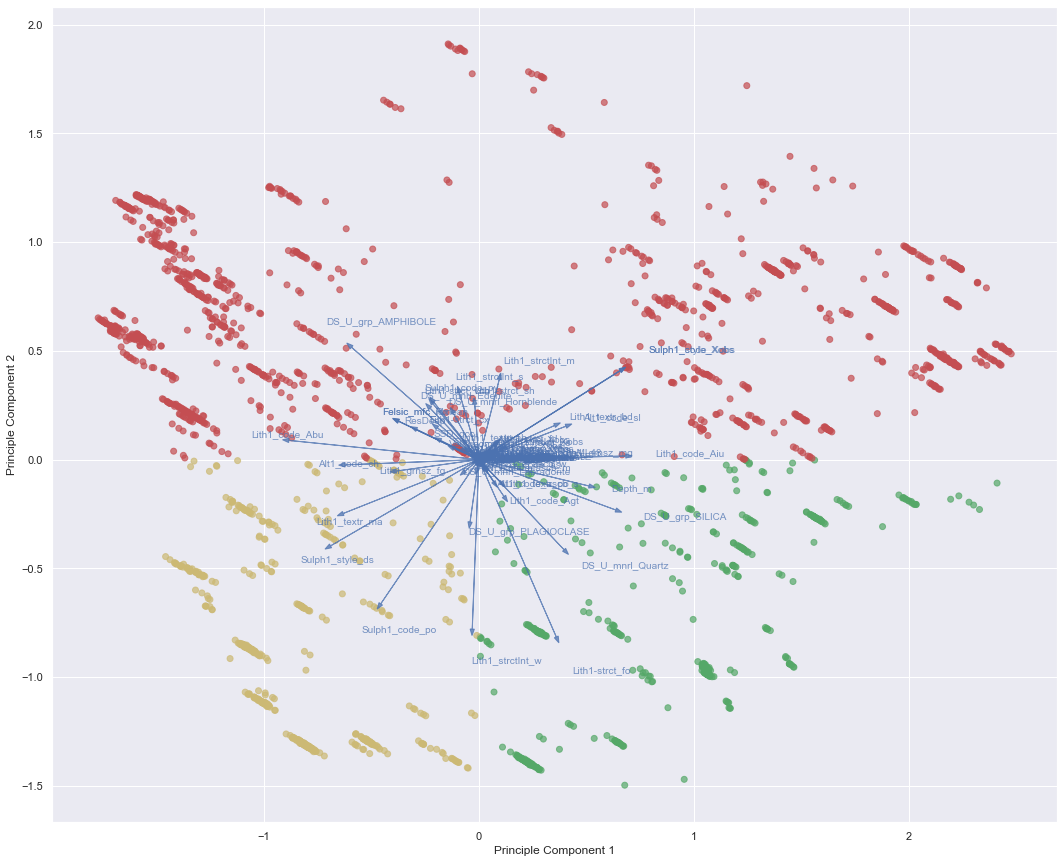

In [121]:
plt.figure(figsize=(18,15))
ax = draw_vectors(T_15EIS, pca_15EIS.components_, scaled_df_comb_15EIS.columns.values)
T_df_15EIS = pd.DataFrame(T_15EIS)
T_df_15EIS.columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
               'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20']

T_df_15EIS['color'] = 'y'
T_df_15EIS.loc[T_df_15EIS['PC-1'] > 0, 'color'] = 'g'
T_df_15EIS.loc[T_df_15EIS['PC-2'] > 0, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df_15EIS['PC-1'], T_df_15EIS['PC-2'], color=T_df_15EIS['color'], alpha=0.7)
plt.show()

https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063
Bottom axis: PC1 score.
Left axis: PC2 score.
Top axis: loadings on PC1.
Right axis: loadings on PC2

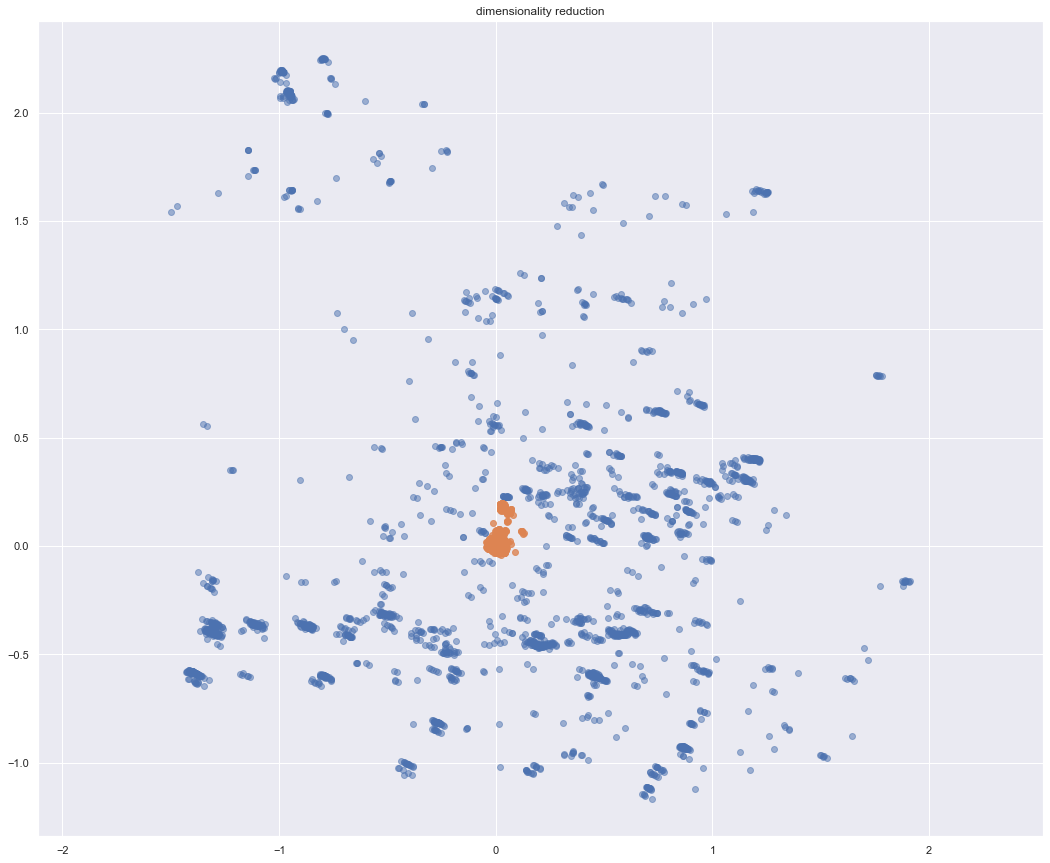

In [122]:
#PCA as dimensionality reduction
plt.figure(figsize=(18,15))
X_new_15EIS = pca_15EIS.inverse_transform(x_pca_15EIS)
plt.scatter(x_pca_15EIS[:, 1], x_pca_15EIS[:, 2], alpha=0.5)
plt.scatter(X_new_15EIS[:, 1], X_new_15EIS[:, 2], alpha=0.8)
plt.title('dimensionality reduction')
plt.axis('equal');

ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=scaled_df_bd1['Sulph1_style_6'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=scaled_df_bd1['Sulph1_style_6'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Populating the interactive namespace from numpy and matplotlib


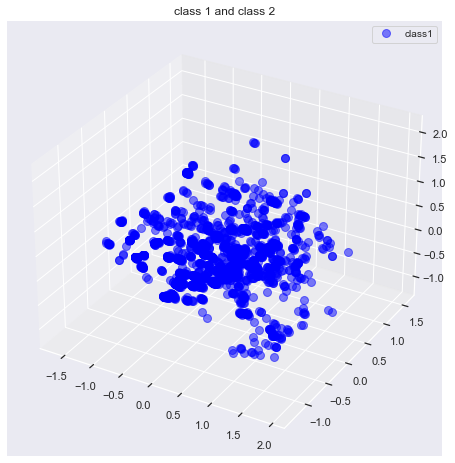

In [123]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(x_pca_15EIS[:,3], x_pca_15EIS[:,5], x_pca_15EIS[:,7], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
#ax.plot(x_pca[:,3], x_pca[:,4], x_pca[:,5], '^', markersize=8, alpha=0.5, color='red', label='class2')
#ax.plot(x_pca[:,3], x_pca[:,4], x_pca[:,5], '*', markersize=8, alpha=0.5, color='green', label='class2')

plt.title('class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [124]:
scaled_df_comb_15EIS.head()

,Alt1_code_Xobs,Alt1_code_ab,Alt1_code_ascb_m,Alt1_code_ascb_s,Alt1_code_ascb_w,Alt1_code_bi,Alt1_code_ch,Alt1_code_ep,Alt1_code_he,Alt1_code_hemag,Alt1_code_sacb,Alt1_code_si,Alt1_code_sl,DS_U_grp_AMPHIBOLE,DS_U_grp_CARBONATE,DS_U_grp_CHLORITE,DS_U_grp_PLAGIOCLASE,DS_U_grp_SILICA,DS_U_mnrl_Albite,DS_U_mnrl_AmphiboleML48,DS_U_mnrl_Andesine,DS_U_mnrl_Calcite,DS_U_mnrl_Chlorite,DS_U_mnrl_Dolomite,DS_U_mnrl_Edenite,DS_U_mnrl_Hornblende,DS_U_mnrl_Kaolinite,DS_U_mnrl_Labradorite,DS_U_mnrl_Oligoclase,DS_U_mnrl_Prehnite,DS_U_mnrl_Quartz,DS_U_mnrl_Siderite,Lith1_code_Aau,Lith1_code_Ab,Lith1_code_Abu,Lith1_code_Ado,Lith1_code_Agp,Lith1_code_Agpf,Lith1_code_Agpq,Lith1_code_Agpy,Lith1_code_Agt,Lith1_code_Aia,Lith1_code_Ait,Lith1_code_Aiu,Lith1_code_Aivc,Lith1_code_Ala,Lith1_code_Aou,Lith1_code_Asb,Lith1_code_Asc,Lith1_code_Xobs,Lith1_grnsz_Xobs,Lith1_grnsz_cg,Lith1_grnsz_fg,Lith1_grnsz_mg,Lith1_strctInt_Xobs,Lith1_strctInt_m,Lith1_strctInt_s,Lith1_strctInt_v,Lith1_strctInt_w,Lith1-strct_Xobs,Lith1-strct_bd,Lith1-strct_bx,Lith1-strct_cc,Lith1-strct_cx,Lith1-strct_fd,Lith1-strct_fo,Lith1-strct_sh,Lith1-strct_vcb,Lith1_textr_Xobs,Lith1_textr_ah,Lith1_textr_bb,Lith1_textr_bd,Lith1_textr_be,Lith1_textr_cc,Lith1_textr_cx,Lith1_textr_cz,Lith1_textr_fr,Lith1_textr_ma,Lith1_textr_po,Lith1_textr_si,Lith1_textr_sp,Lith1_textr_tu,Sulph1_code_Xobs,Sulph1_code_as,Sulph1_code_cp,Sulph1_code_po,Sulph1_code_py,Sulph1_style_Xobs,Sulph1_style_an,Sulph1_style_bd,Sulph1_style_ds,Sulph1_style_eu,Sulph1_style_fg,Sulph1_style_lm,Sulph1_style_su,Felsic_mfc_idx,Felsic_mfc_Rmean,ResDeep,SSD_gcc,Susp_SI,Depth_m,Vel_geomean,Vel_std,Au_ppm
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.510125,0.509152,0.000000,0.763027,0.004504,0.000000,0.937945,0.214843,0.208494
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.569692,0.581917,0.000019,0.737739,0.044752,0.000382,0.937945,0.214843,0.208494
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.629132,0.622406,0.000054,0.738673,0.012007,0.000778,0.665967,0.523274,0.208494
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.633445,0.637410,0.010180,0.737552,0.000000,0.001220,0.665967,0.523274,0.208494
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.686793,0.683484,0.086563,0.775085,0.069683,0.001585,0.746222,0.261088,0.208494


In [125]:
#pca.get_covariance()

In [126]:
#print(pca.components_)

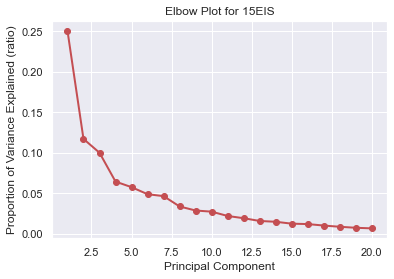

In [127]:
# Elbow plot for feature selection 
PC_values_15EIS = np.arange(pca_15EIS.n_components_) + 1
plt.plot(PC_values_15EIS, pca_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title(('Elbow Plot for 15EIS'), fontsize= 12)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.show()

In [128]:
pca_15EIS.explained_variance_

array([1.51081312, 0.70564314, 0.6028181 , 0.38818318, 0.34672454,
       0.29433999, 0.28002124, 0.20309466, 0.17296543, 0.16445879,
       0.13233566, 0.11570115, 0.09526391, 0.08916873, 0.07515333,
       0.07205418, 0.06114   , 0.05198308, 0.044588  , 0.04015949])

In [129]:
explained_variance_15EIS=pca_15EIS.explained_variance_ratio_
explained_variance_15EIS

array([0.25097444, 0.11722058, 0.10013941, 0.06448452, 0.05759746,
       0.0488954 , 0.04651679, 0.03373784, 0.02873281, 0.02731969,
       0.02198344, 0.01922013, 0.01582512, 0.0148126 , 0.01248438,
       0.01196955, 0.0101565 , 0.00863537, 0.0074069 , 0.00667125])

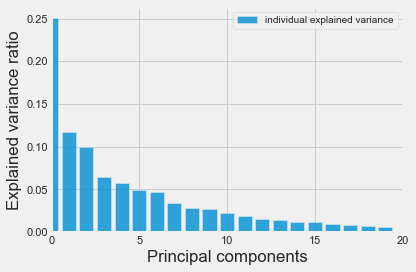

In [130]:
with plt.style.context('fivethirtyeight'):    
    plt.figure(figsize=(6, 4))

    plt.bar(range(20), explained_variance_15EIS, alpha=0.8, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.locator_params(axis="x", integer=True, tight=True, nbins=8)
    plt.xlim(xmin =0, xmax =20)
    plt.legend(loc='best')
    plt.tight_layout()

In [131]:
#Covariance Matrix
cov_mat_15EIS = np.cov(scaled_df_comb_15EIS.T)
eig_vals_15EIS, eig_vecs_15EIS = np.linalg.eig(cov_mat_15EIS)

print('\nEigenvalues \n%s' %eig_vals_15EIS)
print('Eigenvectors \n%s' %eig_vecs_15EIS)
print('Covariance Matrix \n%s' %cov_mat_15EIS)


Eigenvalues 
[ 1.51081312e+00+0.00000000e+00j  7.05643143e-01+0.00000000e+00j
  6.02818103e-01+0.00000000e+00j  3.88183177e-01+0.00000000e+00j
  3.46724544e-01+0.00000000e+00j  2.94339992e-01+0.00000000e+00j
  2.80021242e-01+0.00000000e+00j  2.03094662e-01+0.00000000e+00j
  1.72965427e-01+0.00000000e+00j  1.64458805e-01+0.00000000e+00j
  1.32335669e-01+0.00000000e+00j  1.15701191e-01+0.00000000e+00j
  9.52640046e-02+0.00000000e+00j  8.91689618e-02+0.00000000e+00j
  7.51546477e-02+0.00000000e+00j  7.20555795e-02+0.00000000e+00j
  6.11491439e-02+0.00000000e+00j  5.19930039e-02+0.00000000e+00j
  4.46211702e-02+0.00000000e+00j  4.05122642e-02+0.00000000e+00j
  3.73898164e-02+0.00000000e+00j  3.53933918e-02+0.00000000e+00j
  3.43973505e-02+0.00000000e+00j  3.23317701e-02+0.00000000e+00j
  2.85905462e-02+0.00000000e+00j  2.64439287e-02+0.00000000e+00j
  2.52846033e-02+0.00000000e+00j  2.47917886e-02+0.00000000e+00j
  2.36870095e-02+0.00000000e+00j  2.30328975e-02+0.00000000e+00j
  2.1313865

The above plot means that the  1𝑠𝑡  principal component explains about 21.07% of the total variance in the data and the  2𝑛𝑑  component explians further 8.4%. Therefore, if we just consider first two components, they together explain 28.59% of the total variance.

#calculate Pearson's correlation
corr, _ = pearsonr(x_pca[:,1], x_pca[:,2])
print('Pearsons correlation: %.3f' % corr)

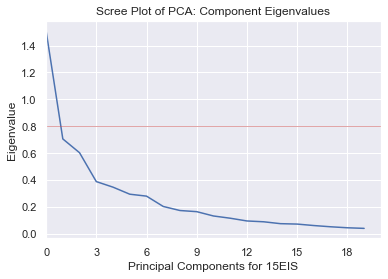

In [132]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca_15EIS.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Components for 15EIS')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=0.8, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    plt.locator_params(axis="x", integer=True, tight=True, nbins=8)
    plt.xlim(xmin =0, xmax = 20)
    save_results_to = '/Users/Computer/pics/'
    plt.savefig(save_results_to + 'PCA_eigen.png', dpi = 300)
    show()

scree_plot()

In [ ]:
plt.plot(np.cumsum(pca_15EIS.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 20)
plt.axvline(10,c='r')
plt.axhline(0.80,c='g')
plt.show()

In [ ]:
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca_15EIS.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=8, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
    plt.xlim(xmin =0, xmax = 20)
    show()

var_explained()

In [ ]:
pca_15EIS.explained_variance_ratio_.sum()

We see that these 20 components account for just over 99.99% of the variance. That would lead us to believe that using 
these 20 components, we would recover most of the essential characteristics of the data.

In [ ]:
pca_15EIS.components_[0, :].shape

In [ ]:
plt.plot(range(20), pca_15EIS.explained_variance_ratio_)
plt.plot(range(20), np.cumsum(pca_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance ratio')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 20)
plt.show()

##### Linear Discriminant Analysis (LDA) can also be tried ..

linked = sch.linkage(x_pca, 'single')
plt.figure(figsize=(50, 20))
# Step 2: Plot the hierarchical clustering as a dendrogram
sch.dendrogram(linked)
plt.show()

## Dimentionality Reduction using TruncatedSVD method

We are using the TruncatedSVD method in the scikit-learn package (Truncated-SVD is a quicker calculation, and using
scikit-learn is more convenient and consistent with our usage elsewhere) to transform the full dataset into a representation
using the top 20 components, thus preserving variance in the data but using fewer dimensions/features to do so. 
This has a similar effect to Principal Component Analysis (PCA) where we represent the original data using an orthogonal 
set of axes rotated and aligned to the variance in the dataset.

Note: we are using 20 as the number of features in the reduction process because it's just a nice round number(!) which 
preserves a lot of variance (~99%) and is still too large to easily visualise, necessitaing the use of t-SNE

In [ ]:
ncomps = 10
svd = TruncatedSVD(n_components=ncomps)
svd_fit = svd.fit(scaled_df_comb)

In [ ]:
Y = svd.fit_transform(scaled_df_comb)

In [ ]:
ax = pd.Series(svd_fit.explained_variance_ratio_.cumsum()).plot(kind='line', figsize=(10, 5))
plt.xlabel('number of components')
plt.ylabel('cumulative variance (%)');
print('Variance preserved by first 10 components == {:.2%}'.format(svd_fit.explained_variance_ratio_.cumsum()[-1]))
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=6, random_state=103).fit_transform(scaled_df_comb.values)

In [ ]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,3])
plt.scatter(svd[:,4],svd[:,5])
plt.scatter(svd[:,5],svd[:,0])
plt.show()

In [ ]:
# Factor Analysis
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(scaled_df_comb.values)
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])
plt.show()

## 3.0 t- Distributed Stochastic Neighbor Embedding (t-SNE) 
So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables. But what if we could use something more advanced? What if we can easily search for patterns in a non-linear way? t-SNE is one such technique. There are mainly two types of approaches we can use to map the data points:

Local approaches :  They maps nearby points on the manifold to nearby points in the low dimensional representation.
Global approaches : They attempt to preserve geometry at all scales, i.e. mapping nearby points on manifold to nearby points in low dimensional representation as well as far away points to far away points.
t-SNE is one of the few algorithms which is capable of retaining both local and global structure of the data at the same time
It calculates the probability similarity of points in high dimensional space as well as in low dimensional space
High-dimensional Euclidean distances between data points are converted into conditional probabilities that represent similarities:

xi and xj are data points, ||xi-xj|| represents the Euclidean distance between these data points, and 𝛔i is the variance of data points in high dimensional space
For the low-dimensional data points yi and yj corresponding to the high-dimensional data points xi and xj, it is possible to compute a similar conditional probability using:

where ||yi-yj|| represents the Euclidean distance between yi and yj
After calculating both the probabilities, it minimizes the difference between both the probabilities. [Reference]https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [ ]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, n_iter=300).fit_transform(scaled_df_comb[:100].values)

In [ ]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])
plt.show()

## 4.0 UMAP
t-SNE works very well on large datasets but it also has it’s limitations, such as loss of large-scale information, slow computation time, and inability to meaningfully represent very large datasets. Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime. Sounds intriguing, right?

Some of the key advantages of UMAP are:

It can handle large datasets and high dimensional data without too much difficulty.
It combines the power of visualization with the ability to reduce the dimensions of the data.
Along with preserving the local structure, it also preserves the global structure of the data. UMAP maps nearby points on the manifold to nearby points in the low dimensional representation, and does the same for far away points.
This method uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. It first calculates the distance between the points in high dimensional space, projects them onto the low dimensional space, and calculates the distance between points in this low dimensional space. It then uses Stochastic Gradient Descent to minimize the difference between these distances.
UMAP reference <https://umap-learn.readthedocs.io/en/latest/>

In [ ]:
#!pip uninstall umap
#!conda config --add channels conda-forge
#!pip install umap-learn
import umap.umap_ as umap

In [ ]:
#import umap.umap_ as umap
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3).fit_transform(scaled_df_comb[:6000].values)

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])
plt.show()

# Splitting Dataframe according to depth interval (~125m)

In [ ]:
print(scaled_df_comb_15EIS.shape)
print(scaled_df_comb_001.shape)
print(scaled_df_comb_002.shape)
print(scaled_df_comb_003.shape)
print(scaled_df_comb_004.shape)

In [ ]:
#df_check_15EIS['Depth_diff']=df_check_15EIS['Depth_m'].diff().fillna(0)
#df_check_15EIS['Depth_diff']

In [ ]:
# splitting dataframe every 125m depth interval (~250 rows in dataframe) for Drill Hole 15EIS (Starting depth from surface 495m and end depth 620m)
df_check_15EIS = num_df2_15EIS_fillna.iloc[:250,:]
df_check_15EIS['Depth_diff']=df_check_15EIS['Depth_m'].diff().fillna(0)
df_check_15EIS['Depth_diff'].sum()

In [ ]:
# splitting dataframe every 125m depth interval (~250 rows in dataframe) for Drill Hole dd001 (Starting depth 57.4m from surface and end depth 182.45m)
df_check_001 = num_df2_001_fillna.iloc[:250,:]
df_check_001['Depth_diff']=df_check_001['Depth_m'].diff().fillna(0)
df_check_001['Depth_diff'].sum()

In [ ]:
# splitting dataframe every 125m depth interval (~250 rows in dataframe) for Drill Hole dd002 (Starting depth 51.5m from surface and end depth 176.62m)
df_check_002 = num_df2_002_fillna.iloc[:250,:]
df_check_002['Depth_diff']=df_check_002['Depth_m'].diff().fillna(0)
df_check_002['Depth_diff'].sum()

In [ ]:
# splitting dataframe every 125m depth interval (~250 rows in dataframe) for Drill Hole dd003B (Starting depth 49.34m and end depth 184.37m)
df_check_003 = num_df2_003_fillna.iloc[:250,:]
df_check_003['Depth_diff']=df_check_003['Depth_m'].diff().fillna(0)
df_check_003['Depth_diff'].sum()

In [ ]:
# splitting dataframe every 125m depth interval (~250 rows in dataframe) for Drill Hole dd004 (Starting depth 0.25m and end depth 125.74m)
df_check_004 = num_df2_004_fillna.iloc[:250,:]
df_check_004['Depth_diff']=df_check_004['Depth_m'].diff().fillna(0)
df_check_004['Depth_diff'].sum()

In [ ]:
df_comb_temp1 = scaled_df_comb.iloc[:250,:]
df_comb_temp1.head()

In [ ]:
# Splitted every ~125m for Drill Hole 15EIS
scaled_df_comb_15EIS_1 = scaled_df_comb_15EIS.iloc[:250,:]
scaled_df_comb_15EIS_2 = scaled_df_comb_15EIS.iloc[251:500,:]
scaled_df_comb_15EIS_3 = scaled_df_comb_15EIS.iloc[501:750,:]
scaled_df_comb_15EIS_4 = scaled_df_comb_15EIS.iloc[751:1000,:]
scaled_df_comb_15EIS_5 = scaled_df_comb_15EIS.iloc[1001:1250,:]
scaled_df_comb_15EIS_6 = scaled_df_comb_15EIS.iloc[1251:1500,:]
scaled_df_comb_15EIS_7 = scaled_df_comb_15EIS.iloc[1501:1750,:]
scaled_df_comb_15EIS_8 = scaled_df_comb_15EIS.iloc[1751:2000,:]
scaled_df_comb_15EIS_9 = scaled_df_comb_15EIS.iloc[2001:2250,:]
scaled_df_comb_15EIS_10 = scaled_df_comb_15EIS.iloc[2251:,:]

In [ ]:
scaled_df_comb_001.shape

In [ ]:
# Splitted every ~125m for Drill Hole dd001
scaled_df_comb_001_1 = scaled_df_comb_001.iloc[:250,:]
scaled_df_comb_001_2 = scaled_df_comb_001.iloc[251:500,:]
scaled_df_comb_001_3 = scaled_df_comb_001.iloc[501:750,:]

In [ ]:
# Splitted every ~125m for Drill Hole dd002
scaled_df_comb_002_1 = scaled_df_comb_002.iloc[:250,:]
scaled_df_comb_002_2 = scaled_df_comb_002.iloc[251:500,:]
scaled_df_comb_002_3 = scaled_df_comb_002.iloc[501:750,:]

In [ ]:
# Splitted every ~125m for Drill Hole dd003B
scaled_df_comb_003_1 = scaled_df_comb_003.iloc[:250,:]
scaled_df_comb_003_2 = scaled_df_comb_003.iloc[251:500,:]
scaled_df_comb_003_3 = scaled_df_comb_003.iloc[501:750,:]
scaled_df_comb_003_4 = scaled_df_comb_003.iloc[751:1000,:]

In [ ]:
# Splitted every ~125m for Drill Hole dd004
scaled_df_comb_004_1 = scaled_df_comb_004.iloc[:250,:]
scaled_df_comb_004_2 = scaled_df_comb_004.iloc[251:500,:]
scaled_df_comb_004_3 = scaled_df_comb_004.iloc[501:750,:]
scaled_df_comb_004_4 = scaled_df_comb_004.iloc[751:1000,:]
scaled_df_comb_004_5 = scaled_df_comb_004.iloc[1001:1250,:]
scaled_df_comb_004_6 = scaled_df_comb_004.iloc[1251:1500,:]

In [ ]:
print(scaled_df_comb_15EIS_1.shape)
print(scaled_df_comb_001_1.shape)
print(scaled_df_comb_002_1.shape)
print(scaled_df_comb_003_1.shape)
print(scaled_df_comb_004_1.shape)

In [ ]:
from sklearn.decomposition import PCA
pca1_15EIS = PCA(n_components=10)
pca2_15EIS = PCA(n_components=10)
pca3_15EIS = PCA(n_components=10)
pca4_15EIS = PCA(n_components=10)
pca5_15EIS = PCA(n_components=10)
pca6_15EIS = PCA(n_components=10)
pca7_15EIS = PCA(n_components=10)
pca8_15EIS = PCA(n_components=10)
pca9_15EIS = PCA(n_components=10)
pca10_15EIS = PCA(n_components=10)

In [ ]:
pca1_15EIS.fit(scaled_df_comb_15EIS_1)
pca2_15EIS.fit(scaled_df_comb_15EIS_2)
pca3_15EIS.fit(scaled_df_comb_15EIS_3)
pca4_15EIS.fit(scaled_df_comb_15EIS_4)
pca5_15EIS.fit(scaled_df_comb_15EIS_5)
pca6_15EIS.fit(scaled_df_comb_15EIS_6)
pca7_15EIS.fit(scaled_df_comb_15EIS_7)
pca8_15EIS.fit(scaled_df_comb_15EIS_8)
pca9_15EIS.fit(scaled_df_comb_15EIS_9)
pca10_15EIS.fit(scaled_df_comb_15EIS_10)

In [ ]:
#scaled_df_comb_1

In [ ]:
target_15EIS_1= scaled_df_comb_15EIS_1['Au_ppm']
target_15EIS_2= scaled_df_comb_15EIS_2['Au_ppm']
target_15EIS_3= scaled_df_comb_15EIS_3['Au_ppm']
targe_15EISt_4= scaled_df_comb_15EIS_4['Au_ppm']
target_15EIS_5= scaled_df_comb_15EIS_5['Au_ppm']
target_15EIS_6= scaled_df_comb_15EIS_6['Au_ppm']
target_15EIS_7= scaled_df_comb_15EIS_7['Au_ppm']
target_15EIS_8= scaled_df_comb_15EIS_8['Au_ppm']
target_15EIS_9= scaled_df_comb_15EIS_9['Au_ppm']
target_15EIS_10= scaled_df_comb_15EIS_10['Au_ppm']

In [ ]:
# https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/
# Dimension reduction
X_pc1 = pca1.fit_transform(scaled_df_comb_15EIS_1) 
X_pc1 = pd.DataFrame(X_pc1) 
X_pc1.columns = ['P1', 'P2','P3', 'P4','P5', 'P6','P7', 'P8','P9', 'P10'] 

In [ ]:
plt.figure(figsize =(14, 8)) 
plt.title('Visualising the data') 
Dendrogram = scipy.cluster.hierarchy.dendrogram((scipy.cluster.hierarchy.linkage(X_pc1, method ='ward'))) 

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 3) 

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_pc1['P1'], X_pc1['P2'], 
		c = ac5.fit_predict(X_pc1), cmap ='rainbow') 
plt.show() 

In [ ]:
print("pca1.components\n",pca1_15EIS.components_) # principal components for depth interval 0-125m (starting depth 495m)
print("pca1.components\n",pca2_15EIS.components_) # principal components for depth 126-250m
print("pca3.components\n",pca3_15EIS.components_) # principal components for depth 251-300m
print("pca4.components\n",pca4_15EIS.components_) # principal components for depth 301-350m
print("pca5.components\n",pca5_15EIS.components_) # principal components for depth 351-400m
print("pca6.components\n",pca6_15EIS.components_) # principal components for depth 401-450m
print("pca7.components\n",pca7_15EIS.components_) # principal components for depth 451-500m
print("pca8.components\n",pca8_15EIS.components_) # principal components for depth 501-750m
print("pca9.components\n",pca9_15EIS.components_) # principal components for depth 751-1000m
print("pca10.components\n",pca10_15EIS.components_) # principal components for depth 1001-1250m

In [ ]:
df_15EIS_pca1_components=pd.DataFrame(pca1_15EIS.components_)
df_15EIS_pca1_components

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(pca1_15EIS.components_)
#sns.heatmap(df_15EIS_pca1_components)
plt.show()

In [ ]:
x_pca1_15EIS = pca1.transform(scaled_df_comb_15EIS_1)
x_pca2_15EIS = pca2.transform(scaled_df_comb_15EIS_2)
x_pca3_15EIS = pca3.transform(scaled_df_comb_15EIS_3)
x_pca4_15EIS = pca4.transform(scaled_df_comb_15EIS_4)
x_pca5_15EIS = pca5.transform(scaled_df_comb_15EIS_5)
x_pca6_15EIS = pca6.transform(scaled_df_comb_15EIS_6)
x_pca7_15EIS = pca7.transform(scaled_df_comb_15EIS_7)
x_pca8_15EIS = pca8.transform(scaled_df_comb_15EIS_8)
x_pca9_15EIS = pca9.transform(scaled_df_comb_15EIS_9)
x_pca10_15EIS = pca10.transform(scaled_df_comb_15EIS_10)

In [ ]:
x_pca1_15EIS.shape

In [ ]:
print("first_component\n",x_pca1_15EIS[:,1])
print("second_component\n",x_pca1_15EIS[:,2])

In [ ]:
df_x_pca1_15EIS = pd.DataFrame(x_pca1_15EIS)
#sns.pairplot(df_x_pca1_15EIS)
#plt.tight_layout()
#plt.show()

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(3,2,1)
plt.scatter(x_pca1_15EIS[:, 1], x_pca1_15EIS[:, 2],
            c=(scaled_df_comb_15EIS_1['Au_ppm']*1e17 ), edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Depth at 495-620m')
plt.colorbar();

plt.subplot(3,2,2)
plt.scatter(x_pca1_15EIS[:, 2], x_pca1_15EIS[:, 3],
            c=scaled_df_comb_15EIS_1['Au_ppm'], edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('PuBuGn', 10))
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('Depth at 495-620m')
plt.colorbar();


plt.subplot(3,2,3)
plt.scatter(x_pca1_15EIS[:, 3], x_pca1_15EIS[:, 4],
            c=scaled_df_comb_15EIS_1['Au_ppm'], edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('PuBuGn', 10))
plt.xlabel('Third Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('Depth at 495-620m')
plt.colorbar();

plt.subplot(3,2,4)
plt.scatter(x_pca1_15EIS[:, 4], x_pca1_15EIS[:, 5],
            c=scaled_df_comb_15EIS_1['Au_ppm'], edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('PuBuGn', 10))
plt.xlabel('Fourth Principal Component')
plt.ylabel('Fifth Principal Component')
plt.title('Depth at 495-620m')
plt.colorbar();
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18,15))
plt.scatter(x_pca1_15EIS[:, 0], x_pca1_15EIS[:, 1]),
plt.scatter(x_pca1_15EIS[:, 1], x_pca1_15EIS[:, 2]),
plt.scatter(x_pca1_15EIS[:, 2], x_pca1_15EIS[:, 3]),
plt.scatter(x_pca1_15EIS[:, 3], x_pca1_15EIS[:, 4]),
plt.scatter(x_pca1_15EIS[:, 4], x_pca1_15EIS[:, 5]),
#            c= (scaled_df_comb_1['Au_ppm']*1e17 ), edgecolor='none', alpha=0.9,
#            cmap=plt.cm.get_cmap('rainbow', 10)),
#plt.xlabel('First Principal Component')
#plt.ylabel('Second Principal Component')
#plt.colorbar()
plt.title('Scatter plot at Depth :495-620m')
plt.show()

###### scatter plot colorbar <https://www.w3schools.com/python/matplotlib_scatter.asp>

In [ ]:
# Dump components relations with features:
pca1_features_dump_15EIS=pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_1.columns,index = ['PC1-1','PC1-2','PC1-3','PC1-4','PC1-5','PC1-6','PC1-7','PC1-8','PC-9','PC-10'])

In [ ]:
pca1_features_dump_15EIS.head()

In [ ]:
pca1_features_transp_15EIS=pca1_features_dump_15EIS.T
pca1_features_transp_15EIS.head()

In [ ]:
plt.figure(figsize =(14, 8)) 
plt.title('Visualising the data') 
Dendrogram = scipy.cluster.hierarchy.dendrogram((scipy.cluster.hierarchy.linkage(X_pc1, method ='ward')))

#### The important features are the ones that influence more the components and thus, have a large absolute value/coefficient/loading on the component.
##### Get the most important feature name on the PCs:

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
# 2409 samples with 104 features
train_features_15EIS = np.random.rand(2409, 104)

model_15EIS = PCA(n_components=10).fit(train_features_15EIS)
X_pc_15EIS = model_15EIS.transform(train_features_15EIS)

# number of components
n_pcs_15EIS= model_15EIS.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important_15EIS = [np.abs(model_15EIS.components_[i]).argmax() for i in range(n_pcs_15EIS)]

initial_feature_names_15EIS = ['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su','Felsic_mfc_idx', 'Felsic_mfc_Rmean', 'ResDeep',
       'SSD_gcc', 'Susp_SI', 'Depth_m', 'Vel_geomean', 'Vel_std']

# get the names
most_important_names_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs_15EIS)]

# using LIST COMPREHENSION HERE AGAIN
dic_15EIS = {'PC{}'.format(i+1): most_important_names_15EIS[i] for i in range(n_pcs_15EIS)}

# build the dataframe
df_imp_features_15EIS = pd.DataFrame(sorted(dic_15EIS.items()))

df_imp_features_15EIS

In [ ]:
#most_important_names

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
map= pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_1.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
sns.heatmap(map, annot=False, cmap=plt.cm.Greens)
plt.title('scaled_df_comb_15EIS_1 Principal components (0-125m)')

plt.subplot(3,3,2)
map= pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_2.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
sns.heatmap(map, annot=False, cmap=plt.cm.Blues)
plt.title('scaled_df_comb_15EIS_2 Principal components (125-250m)')

plt.subplot(3,3,3)
map= pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_3.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
sns.heatmap(map, annot=False, cmap=plt.cm.Reds)
plt.title('scaled_df_comb_15EIS_3 Principal components (250-375m)')

plt.subplot(3,3,4)
map= pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_4.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
sns.heatmap(map, annot=False, cmap=plt.cm.Reds)
plt.title('scaled_df_comb_15EIS_4 Principal components (375-500m)')

plt.subplot(3,3,5)
map= pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_5.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
sns.heatmap(map, annot=False, cmap=plt.cm.Blues)
plt.title('scaled_df_comb_15EIS_5 Principal components (500-625m)')

plt.tight_layout()

In [ ]:
# Dump components relations with features:
df_components_features1_15EIS=pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_1.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [ ]:
# Writing Principal compenents as columns
df_components1_15EIS = df_components_features1_15EIS.T

In [ ]:
# Sorting Principal components in descending order 
df_components1_15EIS = df_components1_15EIS.apply(lambda x: x.sort_values().values)
df_components1_15EIS.head()

In [ ]:
# plot the dendogram 
# Calculate distance
data_dist_components1_15EIS = pdist(df_components1_15EIS.values) # computing the distance

In [ ]:
# Calculate linkage
data_link_components1_15EIS = linkage(df_components1_15EIS.values, 'ward') # computing the linkage (Can try complete or Average)
data_link1_components1_15EIS = linkage(df_components1_15EIS.values, 'complete') # computing the linkage (Can try complete or Average)
data_link2_components1_15EIS = linkage(df_components1_15EIS.values, 'average') # computing the linkage (Can try complete or Average)

In [ ]:
plt.rcParams['figure.figsize'] = (18,40)
plt.subplot(3,3,1)
dendrogram(data_link_components1_15EIS, labels=df_components1_15EIS.index, orientation = 'right',  leaf_rotation=0, leaf_font_size=8) 
plt.grid(False)
plt.xlabel('Distance')
plt.ylabel('Minerals')
plt.title('PCA clustering with linkage "ward"', fontweight='bold', fontsize=12);

plt.subplot(3,3,2)
dendrogram(data_link1_components1_15EIS, labels=df_components1_15EIS.index, orientation = 'right',  leaf_rotation=0, leaf_font_size=8) 
plt.grid(False)
plt.xlabel('Distance')
plt.ylabel('Minerals')
plt.title('PCA clustering with linkage "complete"', fontweight='bold', fontsize=12);

plt.subplot(3,3,3)
dendrogram(data_link2_components1_15EIS, labels=df_components1_15EIS.index, orientation = 'right',  leaf_rotation=0, leaf_font_size=8) 
plt.grid(False)
plt.xlabel('Distance')
plt.ylabel('Minerals')
plt.title('PCA clustering with linkage "average"', fontweight='bold', fontsize=12);

plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot using K- mean clustering 
ac2 = AgglomerativeClustering(n_clusters = 2) 
ac3 = AgglomerativeClustering(n_clusters = 3) 
ac4 = AgglomerativeClustering(n_clusters = 4) 
ac5 = AgglomerativeClustering(n_clusters = 5) 
ac6 = AgglomerativeClustering(n_clusters = 6) 

In [ ]:
# Visualizing the clustering 
plt.figure(figsize =(12,12)) 
plt.subplot(3,3,1)
plt.scatter(df_components1_15EIS['PC-1'], df_components1_15EIS['PC-2'], 
		c = ac2.fit_predict(df_components1_15EIS), cmap ='rainbow') 
plt.title('scatterplot with k=2')

plt.subplot(3,3,2)
plt.scatter(df_components1_15EIS['PC-1'], df_components1_15EIS['PC-2'], 
		c = ac3.fit_predict(df_components1_15EIS), cmap ='rainbow')
plt.title('scatterplot with k=3')

plt.subplot(3,3,3)
plt.scatter(df_components1_15EIS['PC-1'], df_components1_15EIS['PC-2'], 
		c = ac4.fit_predict(df_components1_15EIS), cmap ='rainbow')
plt.title('scatterplot with k=4')

plt.subplot(3,3,4)
plt.scatter(df_components1_15EIS['PC-1'], df_components1_15EIS['PC-2'], 
		c = ac5.fit_predict(df_components1_15EIS), cmap ='rainbow')
plt.title('scatterplot with k=5')

plt.subplot(3,3,5)
plt.scatter(df_components1_15EIS['PC-1'], df_components1_15EIS['PC-2'], 
		c = ac6.fit_predict(df_components1_15EIS), cmap ='rainbow')
plt.title('scatterplot with k=6')

plt.tight_layout()
plt.show() 

In [ ]:
#sns.pairplot(df_components1)
#plt.tight_layout()
#plt.show()

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [ ]:
# 250 samples with 104 features
x_pca1_15EIS = pca1_15EIS.transform(scaled_df_comb_15EIS_1)
x_pca2_15EIS = pca2_15EIS.transform(scaled_df_comb_15EIS_2)
x_pca3_15EIS = pca3_15EIS.transform(scaled_df_comb_15EIS_3)
x_pca4_15EIS = pca4_15EIS.transform(scaled_df_comb_15EIS_4)
x_pca5_15EIS = pca5_15EIS.transform(scaled_df_comb_15EIS_5)
x_pca6_15EIS = pca6_15EIS.transform(scaled_df_comb_15EIS_6)
x_pca7_15EIS = pca7_15EIS.transform(scaled_df_comb_15EIS_7)
x_pca8_15EIS = pca8_15EIS.transform(scaled_df_comb_15EIS_8)
x_pca9_15EIS = pca9_15EIS.transform(scaled_df_comb_15EIS_9)
x_pca10_15EIS = pca10_15EIS.transform(scaled_df_comb_15EIS_10)

In [ ]:
# number of components
n_pcs1_15EIS= pca1_15EIS.components_.shape[0]
n_pcs2_15EIS= pca2_15EIS.components_.shape[0]
n_pcs3_15EIS= pca3_15EIS.components_.shape[0]
n_pcs4_15EIS= pca4_15EIS.components_.shape[0]
n_pcs5_15EIS= pca5_15EIS.components_.shape[0]
n_pcs6_15EIS= pca6_15EIS.components_.shape[0]
n_pcs7_15EIS= pca7_15EIS.components_.shape[0]
n_pcs8_15EIS= pca8_15EIS.components_.shape[0]
n_pcs9_15EIS= pca9_15EIS.components_.shape[0]
n_pcs10_15EIS= pca10_15EIS.components_.shape[0]

In [ ]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important1_15EIS = [np.abs(pca1_15EIS.components_[i]).argmax() for i in range(n_pcs1)]
most_important2_15EIS = [np.abs(pca2_15EIS.components_[i]).argmax() for i in range(n_pcs2)]
most_important3_15EIS = [np.abs(pca3_15EIS.components_[i]).argmax() for i in range(n_pcs3)]
most_important4_15EIS = [np.abs(pca4_15EIS.components_[i]).argmax() for i in range(n_pcs4)]
most_important5_15EIS = [np.abs(pca5_15EIS.components_[i]).argmax() for i in range(n_pcs5)]
most_important6_15EIS = [np.abs(pca6_15EIS.components_[i]).argmax() for i in range(n_pcs6)]
most_important7_15EIS = [np.abs(pca7_15EIS.components_[i]).argmax() for i in range(n_pcs7)]
most_important8_15EIS = [np.abs(pca8_15EIS.components_[i]).argmax() for i in range(n_pcs8)]
most_important9_15EIS = [np.abs(pca9_15EIS.components_[i]).argmax() for i in range(n_pcs9)]
most_important10_15EIS = [np.abs(pca10_15EIS.components_[i]).argmax() for i in range(n_pcs10)]

In [ ]:
initial_feature_names_15EIS = ['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su','Felsic_mfc_idx', 'Felsic_mfc_Rmean', 'ResDeep',
       'SSD_gcc', 'Susp_SI', 'Depth_m', 'Vel_geomean', 'Vel_std']

In [ ]:
#initial_feature_names

In [ ]:
# get the name
most_important_names1_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs1_15EIS)]
most_important_names2_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs2_15EIS)]
most_important_names3_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs3_15EIS)]
most_important_names4_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs4_15EIS)]
most_important_names5_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs5_15EIS)]
most_important_names6_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs6_15EIS)]
most_important_names7_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs7_15EIS)]
most_important_names8_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs8_15EIS)]
most_important_names9_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs9_15EIS)]
most_important_names10_15EIS = [initial_feature_names_15EIS[most_important_15EIS[i]] for i in range(n_pcs10_15EIS)]

In [ ]:
# using LIST COMPREHENSION HERE AGAIN
dic1_15EIS = {'PC_d1_{}'.format(i+1): most_important_names1_15EIS[i] for i in range(n_pcs1_15EIS)}
dic2_15EIS = {'PC_d2_{}'.format(i+1): most_important_names2_15EIS[i] for i in range(n_pcs2_15EIS)}
dic3_15EIS = {'PC_d3_{}'.format(i+1): most_important_names3_15EIS[i] for i in range(n_pcs3_15EIS)}
dic4_15EIS = {'PC_d4_{}'.format(i+1): most_important_names4_15EIS[i] for i in range(n_pcs4_15EIS)}
dic5_15EIS = {'PC_d5_{}'.format(i+1): most_important_names5_15EIS[i] for i in range(n_pcs5_15EIS)}
dic6_15EIS = {'PC_d6_{}'.format(i+1): most_important_names6_15EIS[i] for i in range(n_pcs6_15EIS)}
dic7_15EIS = {'PC_d7_{}'.format(i+1): most_important_names7_15EIS[i] for i in range(n_pcs7_15EIS)}
dic8_15EIS = {'PC_d8_{}'.format(i+1): most_important_names8_15EIS[i] for i in range(n_pcs8_15EIS)}
dic9_15EIS = {'PC_d9_{}'.format(i+1): most_important_names9_15EIS[i] for i in range(n_pcs9_15EIS)}
dic10_15EIS = {'PC_d10_{}'.format(i+1): most_important_names10_15EIS[i] for i in range(n_pcs10_15EIS)}

In [ ]:
# build the dataframe
df_imp_features_15EIS_1 = pd.DataFrame(sorted(dic1_15EIS.items()))
df_imp_features_15EIS_2 = pd.DataFrame(sorted(dic2_15EIS.items()))
df_imp_features_15EIS_3 = pd.DataFrame(sorted(dic3_15EIS.items()))
df_imp_features_15EIS_4 = pd.DataFrame(sorted(dic4_15EIS.items()))
df_imp_features_15EIS_5 = pd.DataFrame(sorted(dic5_15EIS.items()))
df_imp_features_15EIS_6 = pd.DataFrame(sorted(dic6_15EIS.items()))
df_imp_features_15EIS_7 = pd.DataFrame(sorted(dic7_15EIS.items()))
df_imp_features_15EIS_8 = pd.DataFrame(sorted(dic8_15EIS.items()))
df_imp_features_15EIS_9 = pd.DataFrame(sorted(dic9_15EIS.items()))
df_imp_features_15EIS_10 = pd.DataFrame(sorted(dic10_15EIS.items()))

In [ ]:
# Printing Dataframes side by side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [ ]:
display(df_imp_features_15EIS_1)
display(df_imp_features_15EIS_2)
display(df_imp_features_15EIS_3)

In [ ]:
# Printing Dataframes side by side
pd.concat([d.reset_index(drop=True) for d in [df_imp_features_15EIS_1, df_imp_features_15EIS_2,df_imp_features_15EIS_3, df_imp_features_15EIS_4,df_imp_features_15EIS_5,df_imp_features_15EIS_6]], axis=1)

PCA visualisation : https://plotly.com/python/pca-visualization/

In [ ]:
import plotly.express as px
imp_features1_15EIS=scaled_df_comb_15EIS_1[['Lith1-strct_sh','Lith1_code_Aou','Sulph1_style_lm','Sulph1_code_Xobs', 'Lith1-strct_bx','Lith1_code_Agpy',\
                                            'DS_U_mnrl_Kaolinite','DS_U_mnrl_Quartz','Lith1_code_Aivc','SSD_gcc']]

components1_15EIS = pca1_15EIS.fit_transform(imp_features1_15EIS)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca1_15EIS.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components1_15EIS,
    labels=labels,
    dimensions=range(4),
    color=scaled_df_comb_15EIS_1['Au_ppm']
)
#fig.update_traces(diagonal_visible=False)
#fig.show()

In [ ]:
print('PCA Covariance1\n',pca1_15EIS.get_covariance())
print('PCA Covariance2\n',pca2_15EIS.get_covariance())

In [ ]:
print('PCA Components1\n',pca1_15EIS.components_)
print('PCA Components1\n',pca2_15EIS.components_)

In [ ]:
#Covariance Matrix , Eigen Values , Eigen Vectors
# https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

cov_matrix1_15EIS = np.cov(scaled_df_comb_15EIS_1.T)
eig_values1_15EIS, eig_vectors1_15EIS = np.linalg.eigh(cov_matrix1_15EIS)  # use numpy.linalg.eigh instead of numpy.linalg.eig for real value

print('\nEigenvalues1 \n%s' %eig_values1_15EIS)
print('Eigenvectors1 \n%s' %eig_vectors1_15EIS)
print('Covariance Matrix1 \n%s' %cov_matrix1_15EIS)

In [ ]:
sns.heatmap(cov_matrix1_15EIS)
plt.title('Coveriance Matrix')
plt.show()

In [ ]:
print('pca1.explained_variance\n',pca1_15EIS.explained_variance_)
print('pca2.explained_variance\n',pca2_15EIS.explained_variance_)

In [ ]:
# Calculate Explained Variance
explained_variance1_15EIS=pca1_15EIS.explained_variance_ratio_
explained_variance2_15EIS=pca2_15EIS.explained_variance_ratio_
explained_variance3_15EIS=pca3_15EIS.explained_variance_ratio_
explained_variance4_15EIS=pca4_15EIS.explained_variance_ratio_
explained_variance5_15EIS=pca5_15EIS.explained_variance_ratio_
explained_variance6_15EIS=pca6_15EIS.explained_variance_ratio_
explained_variance7_15EIS=pca7_15EIS.explained_variance_ratio_
explained_variance8_15EIS=pca8_15EIS.explained_variance_ratio_
explained_variance9_15EIS=pca9_15EIS.explained_variance_ratio_
explained_variance10_15EIS=pca10_15EIS.explained_variance_ratio_

In [ ]:
print('explained_variance1\n',explained_variance1_15EIS)
print('explained_variance2\n',explained_variance2_15EIS)
print('explained_variance3\n',explained_variance3_15EIS)
print('explained_variance4\n',explained_variance4_15EIS)
print('explained_variance5\n',explained_variance5_15EIS)
print('explained_variance6\n',explained_variance6_15EIS)
print('explained_variance7\n',explained_variance7_15EIS)
print('explained_variance8\n',explained_variance8_15EIS)
print('explained_variance9\n',explained_variance9_15EIS)
print('explained_variance10\n',explained_variance10_15EIS)

In [ ]:
#PCA Explained variance Ratio
print('PCA ratio1\n',pca1_15EIS.explained_variance_ratio_.sum())
print('PCA ratio2\n',pca2_15EIS.explained_variance_ratio_.sum())
print('PCA ratio3\n',pca3_15EIS.explained_variance_ratio_.sum())
print('PCA ratio4\n',pca4_15EIS.explained_variance_ratio_.sum())
print('PCA ratio5\n',pca5_15EIS.explained_variance_ratio_.sum())
print('PCA ratio6\n',pca6_15EIS.explained_variance_ratio_.sum())
print('PCA ratio7\n',pca7_15EIS.explained_variance_ratio_.sum())
print('PCA ratio8\n',pca8_15EIS.explained_variance_ratio_.sum())
print('PCA ratio9\n',pca9_15EIS.explained_variance_ratio_.sum())
print('PCA ratio10\n',pca10_15EIS.explained_variance_ratio_.sum())

In [ ]:
# Elbow plot for feature selection 
#PC_values1 = np.arange(pca1.n_components_) + 1
#plt.plot(PC_values1, pca1.explained_variance_ratio_, 'go-',  linewidth=2)
#plt.title('Elbow Plot')
#plt.xlabel('Principal Component')
#plt.ylabel('Proportion of Variance Explained (ratio)')
#plt.show()

In [ ]:
# https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

In [ ]:
from matplotlib.ticker import MaxNLocator
PC_values1_15EIS = np.arange(pca1_15EIS.n_components_) + 1
PC_values2_15EIS = np.arange(pca2_15EIS.n_components_) + 1
PC_values3_15EIS = np.arange(pca3_15EIS.n_components_) + 1
PC_values4_15EIS = np.arange(pca4_15EIS.n_components_) + 1
PC_values5_15EIS = np.arange(pca5_15EIS.n_components_) + 1
PC_values6_15EIS = np.arange(pca6_15EIS.n_components_) + 1
PC_values7_15EIS = np.arange(pca7_15EIS.n_components_) + 1
PC_values8_15EIS = np.arange(pca8_15EIS.n_components_) + 1
PC_values9_15EIS = np.arange(pca9_15EIS.n_components_) + 1
PC_values10_15EIS = np.arange(pca10_15EIS.n_components_) + 1

plt.figure(figsize=(15,20))
plt.subplot(4, 3, 1)
plt.plot(PC_values1_15EIS, pca1_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.subplot(4, 3, 2)
plt.plot(PC_values2_15EIS, pca2_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)


plt.subplot(4, 3, 3)
plt.plot(PC_values3_15EIS, pca3_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 3')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)


plt.subplot(4, 3, 4)
plt.plot(PC_values4_15EIS, pca4_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 4')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.subplot(4, 3, 5)
plt.plot(PC_values5_15EIS, pca5_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 5')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)


plt.subplot(4, 3, 6)
plt.plot(PC_values6_15EIS, pca6_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 6')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.subplot(4, 3, 7)
plt.plot(PC_values7_15EIS, pca7_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 7')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.subplot(4, 3, 8)
plt.plot(PC_values8_15EIS, pca8_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 8')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.subplot(4, 3, 9)
plt.plot(PC_values9_15EIS, pca9_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 9')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.subplot(4, 3, 10)
plt.plot(PC_values10_15EIS, pca10_15EIS.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot 10')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,12))
#plt.subplot(4, 3, 1)
#plt.plot(PC_values1_15EIS, pca1_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values2_15EIS, pca2_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values3_15EIS, pca3_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values4_15EIS, pca4_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values5_15EIS, pca5_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values6_15EIS, pca6_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values7_15EIS, pca7_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values8_15EIS, pca8_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values9_15EIS, pca9_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_values10_15EIS, pca10_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (ratio)')
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 12)
plt.legend(["depth125m","depth250m","depth375m","depth500m","depth625m","depth750m","depth875m","depth1000m","depth1125m","depth1250m"])

In [ ]:
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
plt.plot(np.cumsum(pca1_15EIS.explained_variance_ratio_),'bo-', linewidth=2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axvline(4, c='g')
plt.axhline(0.8, c='r')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(15,20))
plt.subplot(4, 3, 1)
plt.plot(range(10),(pca1_15EIS.explained_variance_ratio_))
plt.plot(range(10), np.cumsum(pca1_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance1")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 2)
plt.plot(range(10), pca2_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca2_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance2")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 3)
plt.plot(range(10), pca3_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca3_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance3")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 4)
plt.plot(range(10), pca4_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca4_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance4")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 5)
plt.plot(range(10), pca5_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca5_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance5")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 6)
plt.plot(range(10), pca6_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca6_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance6")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 7)
plt.plot(range(10), pca7_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca7_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance7")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 8)
plt.plot(range(10), pca8_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca8_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance8")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 9)
plt.plot(range(10), pca9_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca9_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance9")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(4, 3, 10)
plt.plot(range(10), pca10_15EIS.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca10_15EIS.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance10")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(15,20))
plt.plot(PC_values1_15EIS, np.cumsum(pca1_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values2_15EIS, np.cumsum(pca2_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values3_15EIS, np.cumsum(pca3_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values4_15EIS, np.cumsum(pca4_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values5_15EIS, np.cumsum(pca5_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values6_15EIS, np.cumsum(pca6_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values7_15EIS, np.cumsum(pca7_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values8_15EIS, np.cumsum(pca8_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values9_15EIS, np.cumsum(pca9_15EIS.explained_variance_ratio_),'o-')
plt.plot(PC_values10_15EIS, np.cumsum(pca10_15EIS.explained_variance_ratio_),'o-')
plt.title("Component-wise and Cumulative Explained Variance1")
plt.locator_params(axis="x", integer=True, tight=True, nbins=10)
plt.xlim(xmin =0, xmax = 12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(["depth125m","depth250m","depth375m","depth500m","depth625m","depth750m","depth875m","depth1000m","depth1125m","depth1250m"])
plt.show()


# PCA combined with K-means clustering 
#### <https://365datascience.com/pca-k-means/>

In [ ]:
from sklearn.cluster import KMeans # Our clustering algorithm
import numpy as np

In [ ]:
# Calculate PCA scores
#x_pca1 = pca1.transform(scaled_df_comb_1)
scores_pca1_15EIS = pca1.transform(scaled_df_comb_15EIS_1)
#scores_pca1 = pca1.transform(df_components_features1)

In [ ]:
scores_pca1_15EIS

In [ ]:
# K-means clustering with PCA
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model_pca1_15EIS = KMeans(n_clusters=k, init = 'k-means++', random_state = 20)
    
    # Fit model to samples
    model_pca1_15EIS.fit(scores_pca1_15EIS)
    
    # Append the inertia to the list of inertias
    inertias.append(model_pca1_15EIS.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.axvline(5, c='b')
plt.axhline(300, c='r')
plt.show()

In [ ]:
model_pca1_15EIS = KMeans(n_clusters = 5, init = 'k-means++', random_state = 20)

In [ ]:
model_pca1_15EIS.fit(scores_pca1_15EIS)

In [ ]:
df_pca1_kmeans_15EIS = pd.concat([scaled_df_comb_15EIS_1.reset_index(drop= True), pd.DataFrame(scores_pca1_15EIS)], axis=1)

In [ ]:
df_pca1_kmeans_15EIS.columns.values[-5:] = ['pc1','pc2','pc3','pc4','pc5']
#df_pca1_kmeans.columns.values[-4:]

In [ ]:
df_pca1_kmeans_15EIS['K-means PCA1'] = model_pca1_15EIS.labels_

In [ ]:
df_pca1_kmeans_15EIS.head()

In [ ]:
df_pca1_kmeans_15EIS['Au_ppm'] = df_pca1_kmeans_15EIS['K-means PCA1'].map({0:'first',1:'second',2:'third', 3:'fourth',4:'fifth'})

In [ ]:
x_axis = df_pca1_kmeans_15EIS['pc2']
y_axis = df_pca1_kmeans_15EIS['pc1']
plt.figure(figsize = (15,12))
sns.scatterplot(x_axis,y_axis, hue = df_pca1_kmeans_15EIS['Au_ppm'], palette = ('g','r','c','m'))
plt.show()

## Heirerical Clustering (Agglomerative Clustering)

https://www.askpython.com/python/examples/hierarchical-clustering
https://colab.research.google.com/github/Gurubux/CognitiveClass-ML/blob/master/Course_MachineLearningWithPython/5-Clustering/ML0101EN-Clus-Hierarchical-Cars-py-v1.ipynb#scrollTo=VoeEZ7pZABdH

https://github.com/avangelatos/hcluster (Used)

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318

https://python-graph-gallery.com/401-customised-dendrogram/

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r/

https://www.sciencedirect.com/topics/engineering/hierarchical-clustering

https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/

In [ ]:
#scaled_df_comb_1
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.cluster import silhouette_score

In [ ]:
temp1_15EIS=df_pca1_kmeans_15EIS.iloc[:,109:114]
temp1_15EIS.head()

In [ ]:
#temp1=scaled_df_comb_1.values
#temp1=df_pca1_kmeans.values
temp2_15EIS=temp1_15EIS.values
temp2_15EIS.shape

In [ ]:
# Calculate distance
data_dist_15EIS = pdist(temp2_15EIS) # computing the distance
data_link_15EIS = linkage(temp2_15EIS, 'ward') # computing the linkage (Can try complete or Average)
data_link1_15EIS = linkage(temp2_15EIS, 'complete') # computing the linkage (Can try complete or Average)
data_link2_15EIS = linkage(temp2_15EIS, 'average') # computing the linkage (Can try complete or Average)

In [ ]:
# The closer the value is to 1, the better the clustering preserves the original distances:
c, coph_dists_15EIS = cophenet(data_link_15EIS, data_dist_15EIS)
c

### Calculate Silhoutte Score 

In [ ]:
# Lets calculate the best Silhouette Score for ward
for k in range(2,7):
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage ='ward')
    q=model.fit_predict(temp2_15EIS)
    s = silhouette_score(temp2_15EIS , q, metric='euclidean')
#    print(s)
    print ("{0:.0f} number of clusters has silhoutte score of {1:.4f}".format(k,s))

 ### Evaluating the different models and Visualizing the results

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
ac3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
ac4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
ac5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
ac6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
ac7 = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')
ac8 = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='ward')

In [ ]:
k = [2, 3, 4, 5, 6, 7, 8] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac2.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac3.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac4.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac5.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac6.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac7.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, ac8.fit_predict(temp2_15EIS))) 

# Plotting a bar graph to compare the results 
plt.figure(figsize=(6,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20)
plt.title('Silhouette Score with linkage "ward"')
plt.show() 


In [ ]:
# Lets calculate the best Silhouette Score for complete
for k in range(2,7):
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage ='complete')
    q=model.fit_predict(temp2_15EIS)
    s = silhouette_score(temp2_15EIS , q, metric='euclidean')
    print ("{0:.0f} number of clusters has silhoutte score of {1:.4f}".format(k,s))

In [ ]:
acc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
acc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
acc4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')
acc5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')
acc6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')
acc7 = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='complete')
acc8 = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='complete')

In [ ]:
k = [2, 3, 4, 5, 6, 7, 8] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc2.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc3.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc4.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc5.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc6.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc7.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, acc8.fit_predict(temp2_15EIS))) 

# Plotting a bar graph to compare the results 
plt.figure(figsize=(6,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette Score with linkage "complete"')
plt.show() 


In [ ]:
# Lets calculate the best Silhouette Score for average
for k in range(2,7):
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage ='average')
    q=model.fit_predict(temp2_15EIS)
    s = silhouette_score(temp2_15EIS , q, metric='euclidean')
    print ("{0:.0f} number of clusters has silhoutte score of {1:.4f}".format(k,s))

In [ ]:
aca2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average')
aca3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
aca4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')
aca5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
aca6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='average')
aca7 = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='average')
aca8 = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='average')

In [ ]:
k = [2, 3, 4, 5, 6, 7, 8] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca2.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca3.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca4.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca5.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca6.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca7.fit_predict(temp2_15EIS))) 
silhouette_scores.append( 
		silhouette_score(temp2_15EIS, aca8.fit_predict(temp2_15EIS))) 

# Plotting a bar graph to compare the results 
plt.figure(figsize=(6,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.title('Silhouette Score with linkage "average"')
plt.show() 

In [ ]:
#!conda install -c districtdatalabs yellowbrick
#!pip install yellowbrick
#!conda install scikit-learn
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# We can see that each row of the resulting array has the format [idx1, idx2, dist, sample_count].
data_link_15EIS[0]

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 101 and 127,
as they only had a distance of 0.00137492516. This created a cluster with a total of 2 samples.

In [ ]:
data_link_15EIS[1]

In [ ]:
# First 10 iteration 
data_link_15EIS[:20]

## Dendrogram

In [ ]:
plt.rcParams['figure.figsize'] = (25, 10)
dendrogram(data_link_15EIS, labels=scaled_df_comb_15EIS_1.index, leaf_rotation=90.0, leaf_font_size=9.)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.suptitle('Heirerical clustering', fontweight='bold', fontsize=20);

In [ ]:
plt.title('Heirerical Clustering (truncated)',fontweight='bold', fontsize=20)
plt.xlabel('cluster size')
plt.ylabel('Distance')
dendrogram(
    data_link_15EIS,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
#    orientation='right',
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### HeatMap

In [ ]:

# Compute and plot first dendrogram.
fig = plt.figure(figsize=(18,18))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y1_15EIS = linkage(data_dist_15EIS, method='ward')
Z1_15EIS = dendrogram(Y1_15EIS, orientation='left',labels=scaled_df_comb_15EIS_1.index) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2_15EIS = dendrogram(Y1_15EIS)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1_15EIS['leaves']
idx2 = Z2_15EIS['leaves']
D = squareform(data_dist_15EIS)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

## Using the centroid method resembles k-means results...

In [ ]:
data_dist_15EIS = pdist(temp2_15EIS) # computing the distance
data_link_15EIS = linkage(temp2_15EIS, 'centroid') # computing the linkage

plt.rcParams['figure.figsize'] = (15, 9)
dendrogram(data_link_15EIS, labels=scaled_df_comb_15EIS_1.index, leaf_rotation=90.0, leaf_font_size=4.)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

In [ ]:
plt.title('Samples Clustering (truncated)', fontsize=8)
plt.xlabel('Sample (cluster size)')
plt.ylabel('Distance')
dendrogram(
    data_link_15EIS,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
hc_15EIS = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')

In [ ]:
y_hc_15EIS=hc_15EIS.fit_predict(temp2_15EIS)

In [ ]:
plt.scatter(temp2_15EIS[y_hc==0, 0], temp2_15EIS[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(temp2_15EIS[y_hc==1, 0], temp2_15EIS[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(temp2_15EIS[y_hc==2, 0], temp2_15EIS[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(temp2_15EIS[y_hc==3, 0], temp2_15EIS[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(temp2_15EIS[y_hc==4, 0], temp2_15EIS[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Minerals (Hierarchical Clustering Model, affnity:Euclidean)', fontsize=20 , fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
df_temp_15EIS_1= pd.DataFrame(pca1_15EIS.components_,columns=scaled_df_comb_15EIS_1.columns,index = ['PC_d1_1','PC_d1_2','PC_d1_3','PC_d1_4','PC_d1_5','PC_d1_6','PC_d1_7','PC_d1_8','PC_d1_9','PC_d1_10'])

In [ ]:
df_temp_15EIS_1.reset_index(drop=True, inplace=True)

In [ ]:
df_temptrans_15EIS_1=df_temp_15EIS_1.T
df_temptrans_15EIS_1.head()

In [ ]:
pca1_data_dist_15EIS = pdist(df_temptrans_15EIS_1) # computing the distance
pca1_data_link_15EIS = linkage(df_temptrans_15EIS_1, 'complete') # computing the linkage (ward, centroid,complete or average)

plt.rcParams['figure.figsize'] = (12,16)
dendrogram(pca1_data_link, labels=df_temptrans_1.index, orientation = 'right',  leaf_rotation=0, leaf_font_size=8)
plt.grid(False)
plt.xlabel('Distance')
plt.ylabel('Minerals')
plt.suptitle('PCA clustering', fontweight='bold', fontsize=20);

In [ ]:
#df_imp_features_1
pca1_data_dist_15EIS = pdist(df_temptrans_15EIS_1) # computing the distance
pca1_data_link_15EIS = linkage(df_temptrans_15EIS_1, 'ward') # computing the linkage (ward, centroid,complete or average)

plt.rcParams['figure.figsize'] = (15,15)
dendrogram(pca1_data_link_15EIS, labels=df_temptrans_15EIS_1.index, orientation = 'right',  leaf_rotation=0, leaf_font_size=8.)
plt.grid(False)
plt.xlabel('Distance')
plt.ylabel('Minerals')
plt.suptitle('PCA clustering', fontweight='regular', fontsize=12);

In [ ]:
pca1_data_dist_15EIS = pdist(df_temptrans_15EIS_1) # computing the distance
pca1_data_link_15EIS = linkage(df_temptrans_15EIS_1, 'average') # computing the linkage (ward, centroid,complete or average)

plt.rcParams['figure.figsize'] = (8,16)
dendrogram(pca1_data_link_15EIS, labels=df_temptrans_15EIS_1.index, orientation = 'right',  leaf_rotation=0, leaf_font_size=8)
plt.grid(False)
plt.xlabel('Distance')
plt.ylabel('Minerals')
plt.suptitle('PCA clustering', fontweight='regular', fontsize=16);

## Splitting the data for 15EIS HOLE in 2 parts above fault which is located at 1390m (1790) and below fault (2409-1790= 619)

In [ ]:
b4fault_comb_15EIS_1 = scaled_df_comb_15EIS.iloc[:1790,:]
afterfault_comb_15EIS_2 = scaled_df_comb_15EIS.iloc[1791:2409:]

In [ ]:
print(b4fault_comb_15EIS_1.shape)
print(afterfault_comb_15EIS_2.shape)

In [ ]:
b4fault_pc1_15EIS = PCA(n_components=10)
afterfault_pc2_15EIS = PCA(n_components=10)

In [ ]:
b4fault_pc1_15EIS.fit(b4fault_comb_15EIS_1)
afterfault_pc2_15EIS.fit(afterfault_comb_15EIS_2)

In [ ]:
b4fault_target_15EIS_1= b4fault_comb_15EIS_1['Au_ppm']
afterfault_target_15EIS_2= afterfault_comb_15EIS_2['Au_ppm']

In [ ]:
print("b4fault_pc1.components\n",b4fault_pc1_15EIS.components_) # principal components for depth interval 0-1309m (starting depth 495m)
print("afterfault_pc2.components\n",afterfault_pc2_15EIS.components_) # principal components for depth 1309-1702m

In [ ]:
# Dump components relations with features:
b4fault_pc1_features_dump_15EIS=pd.DataFrame(b4fault_pc1_15EIS.components_,columns= b4fault_comb_15EIS_1.columns,index = ['PC1-1','PC1-2','PC1-3','PC1-4','PC1-5','PC1-6','PC1-7','PC1-8','PC1-9','PC1-10'])
afterfault_pc2_features_dump_15EIS=pd.DataFrame(afterfault_pc2_15EIS.components_,columns= afterfault_comb_15EIS_2.columns,index = ['PC2-1','PC2-2','PC2-3','PC2-4','PC2-5','PC2-6','PC2-7','PC2-8','PC2-9','PC2-10'])

In [ ]:
##Extracting umportant features according to principal components befor the fault
import pandas as pd
import numpy as np
np.random.seed(0)
# 2409 samples with 104 features
train_features_b4fault_15EIS = np.random.rand(2409, 104)

model_b4fault_15EIS = PCA(n_components=10).fit(train_features_b4fault_15EIS)
X_pc1_b4fault_15EIS = model_15EIS.transform(train_features_b4fault_15EIS)

# number of components
n_pcs_b4fault_15EIS= model_b4fault_15EIS.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important_b4fault_15EIS = [np.abs(model_b4fault_15EIS.components_[i]).argmax() for i in range(n_pcs_b4fault_15EIS)]

initial_feature_b4fault_15EIS = ['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su','Felsic_mfc_idx', 'Felsic_mfc_Rmean', 'ResDeep',
       'SSD_gcc', 'Susp_SI', 'Depth_m', 'Vel_geomean', 'Vel_std']

# get the names
most_important_b4fault_15EIS = [initial_feature_b4fault_15EIS[most_important_b4fault_15EIS[i]] for i in range(n_pcs_b4fault_15EIS)]

# using LIST COMPREHENSION HERE AGAIN
dic_b4fault_15EIS = {'PC{}'.format(i+1): most_important_b4fault_15EIS[i] for i in range(n_pcs_b4fault_15EIS)}

# build the dataframe
imp_features_b4fault_15EIS = pd.DataFrame(sorted(dic_b4fault_15EIS.items()))

imp_features_b4fault_15EIS


In [ ]:
##Extracting umportant features according to principal components after the fault

import pandas as pd
import numpy as np
np.random.seed(0)
# 2409 samples with 104 features
train_features_afterfault_15EIS = np.random.rand(2409, 104)

model_afterfault_15EIS = PCA(n_components=10).fit(train_features_afterfault_15EIS)
X_pc1_afterfault_15EIS = model_15EIS.transform(train_features_afterfault_15EIS)

# number of components
n_pcs_afterfault_15EIS= model_afterfault_15EIS.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important_afterfault_15EIS = [np.abs(model_afterfault_15EIS.components_[i]).argmax() for i in range(n_pcs_afterfault_15EIS)]

initial_feature_afterfault_15EIS = ['Alt1_code_Xobs', 'Alt1_code_ab', 'Alt1_code_ascb_m',
       'Alt1_code_ascb_s', 'Alt1_code_ascb_w', 'Alt1_code_bi', 'Alt1_code_ch',
       'Alt1_code_ep', 'Alt1_code_he', 'Alt1_code_hemag', 'Alt1_code_sacb',
       'Alt1_code_si', 'Alt1_code_sl', 'DS_U_grp_AMPHIBOLE',
       'DS_U_grp_CARBONATE', 'DS_U_grp_CHLORITE', 'DS_U_grp_PLAGIOCLASE',
       'DS_U_grp_SILICA', 'DS_U_mnrl_Albite', 'DS_U_mnrl_AmphiboleML48',
       'DS_U_mnrl_Andesine', 'DS_U_mnrl_Calcite', 'DS_U_mnrl_Chlorite',
       'DS_U_mnrl_Dolomite', 'DS_U_mnrl_Edenite', 'DS_U_mnrl_Hornblende',
       'DS_U_mnrl_Kaolinite', 'DS_U_mnrl_Labradorite', 'DS_U_mnrl_Oligoclase',
       'DS_U_mnrl_Prehnite', 'DS_U_mnrl_Quartz', 'DS_U_mnrl_Siderite',
       'Lith1_code_Aau', 'Lith1_code_Ab', 'Lith1_code_Abu', 'Lith1_code_Ado',
       'Lith1_code_Agp', 'Lith1_code_Agpf', 'Lith1_code_Agpq',
       'Lith1_code_Agpy', 'Lith1_code_Agt', 'Lith1_code_Aia', 'Lith1_code_Ait',
       'Lith1_code_Aiu', 'Lith1_code_Aivc', 'Lith1_code_Ala', 'Lith1_code_Aou',
       'Lith1_code_Asb', 'Lith1_code_Asc', 'Lith1_code_Xobs',
       'Lith1_grnsz_Xobs', 'Lith1_grnsz_cg', 'Lith1_grnsz_fg',
       'Lith1_grnsz_mg', 'Lith1_strctInt_Xobs', 'Lith1_strctInt_m',
       'Lith1_strctInt_s', 'Lith1_strctInt_v', 'Lith1_strctInt_w',
       'Lith1-strct_Xobs', 'Lith1-strct_bd', 'Lith1-strct_bx',
       'Lith1-strct_cc', 'Lith1-strct_cx', 'Lith1-strct_fd', 'Lith1-strct_fo',
       'Lith1-strct_sh', 'Lith1-strct_vcb', 'Lith1_textr_Xobs',
       'Lith1_textr_ah', 'Lith1_textr_bb', 'Lith1_textr_bd', 'Lith1_textr_be',
       'Lith1_textr_cc', 'Lith1_textr_cx', 'Lith1_textr_cz', 'Lith1_textr_fr',
       'Lith1_textr_ma', 'Lith1_textr_po', 'Lith1_textr_si', 'Lith1_textr_sp',
       'Lith1_textr_tu', 'Sulph1_code_Xobs', 'Sulph1_code_as',
       'Sulph1_code_cp', 'Sulph1_code_po', 'Sulph1_code_py',
       'Sulph1_style_Xobs', 'Sulph1_style_an', 'Sulph1_style_bd',
       'Sulph1_style_ds', 'Sulph1_style_eu', 'Sulph1_style_fg',
       'Sulph1_style_lm', 'Sulph1_style_su','Felsic_mfc_idx', 'Felsic_mfc_Rmean', 'ResDeep',
       'SSD_gcc', 'Susp_SI', 'Depth_m', 'Vel_geomean', 'Vel_std']

# get the names
most_important_afterfault_15EIS = [initial_feature_afterfault_15EIS[most_important_afterfault_15EIS[i]] for i in range(n_pcs_afterfault_15EIS)]

# using LIST COMPREHENSION HERE AGAIN
dic_afterfault_15EIS = {'PC{}'.format(i+1): most_important_afterfault_15EIS[i] for i in range(n_pcs_afterfault_15EIS)}

# build the dataframe
imp_features_afterfault_15EIS = pd.DataFrame(sorted(dic_afterfault_15EIS.items()))

imp_features_afterfault_15EIS


In [ ]:
# Printing Dataframes side by side
pd.concat([d.reset_index(drop=True) for d in [imp_features_b4fault_15EIS, imp_features_afterfault_15EIS]], axis=1)

In [ ]:
from matplotlib.ticker import MaxNLocator
PC_b4fault_values1_15EIS = np.arange(b4fault_pc1_15EIS.n_components_) + 1
PC_afterfault_values2_15EIS = np.arange(afterfault_pc2_15EIS.n_components_) + 1

In [ ]:
plt.figure(figsize=(8,10))
#plt.subplot(4, 3, 1)
plt.plot(PC_b4fault_values1_15EIS, b4fault_pc1_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.plot(PC_afterfault_values2_15EIS, afterfault_pc2_15EIS.explained_variance_ratio_, 'o-', linewidth=2)
plt.legend(["PCs above fault", "PCs below fault"])
plt.show()